# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rc, font_manager

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)
plt.rcParams['figure.figsize']=(12,9)

In [4]:
# titanic 데이터 로드
titanic=sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# titanic field
- survived: 생존여부
- pclass: 좌석등급
- sex: 성별
- age: 나이
- sibsp: 형제자매 + 배우자 숫자
- parch: 부모자식 숫자
- fare: 요금
- embarked: 탑승 항구
- class: 좌석등급 (영문)
- who: 사람 구분
- deck: 데크
- embark_town: 탑승 항구 (영문)
- alive: 생존여부 (영문)
- alone: 혼자인지 여부

In [5]:
# tips 데이터 셋 load
tips=sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# tips 데이터 셋 필드
- total_bill: 총 합계 요금표
- tip: 팁
- sex: 성별
- smoker: 흡연자 여부
- day: 요일
- time: 식사 시간
- size: 식사 인원

## 1. countplot()
- 항목의 갯수를 세어줌
- 알아서 column을 구성하고 있는 value들을 구분하여 보여줌

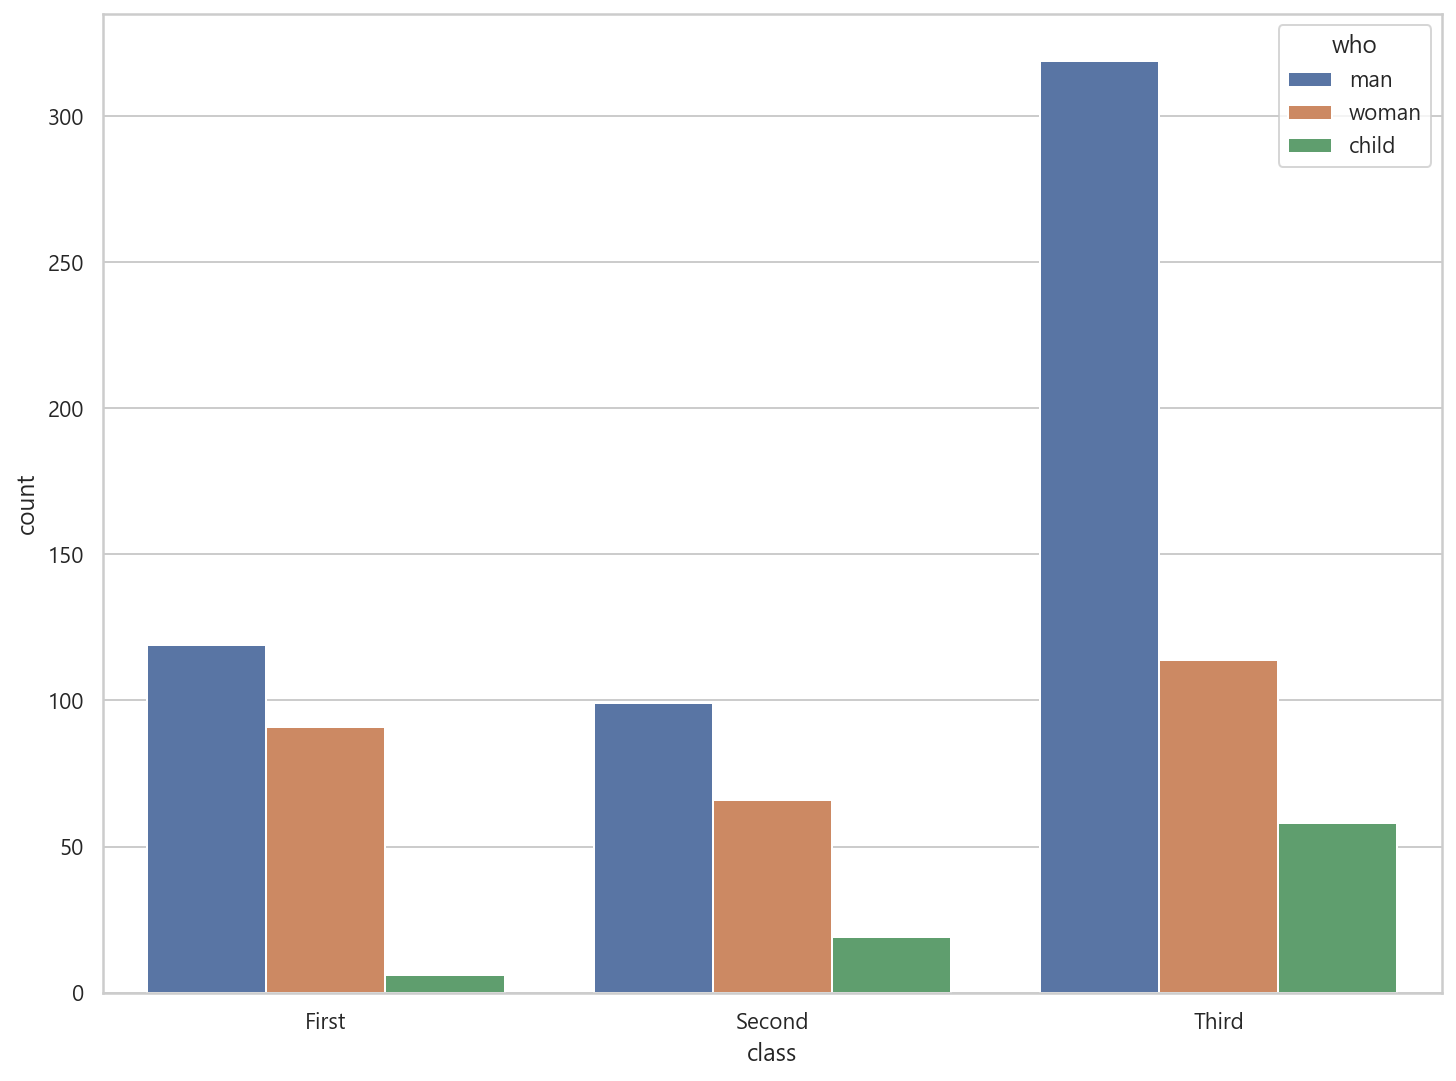

In [6]:
sns.countplot(x="class", hue="who", data=titanic)
plt.show()

<AxesSubplot:xlabel='day', ylabel='count'>

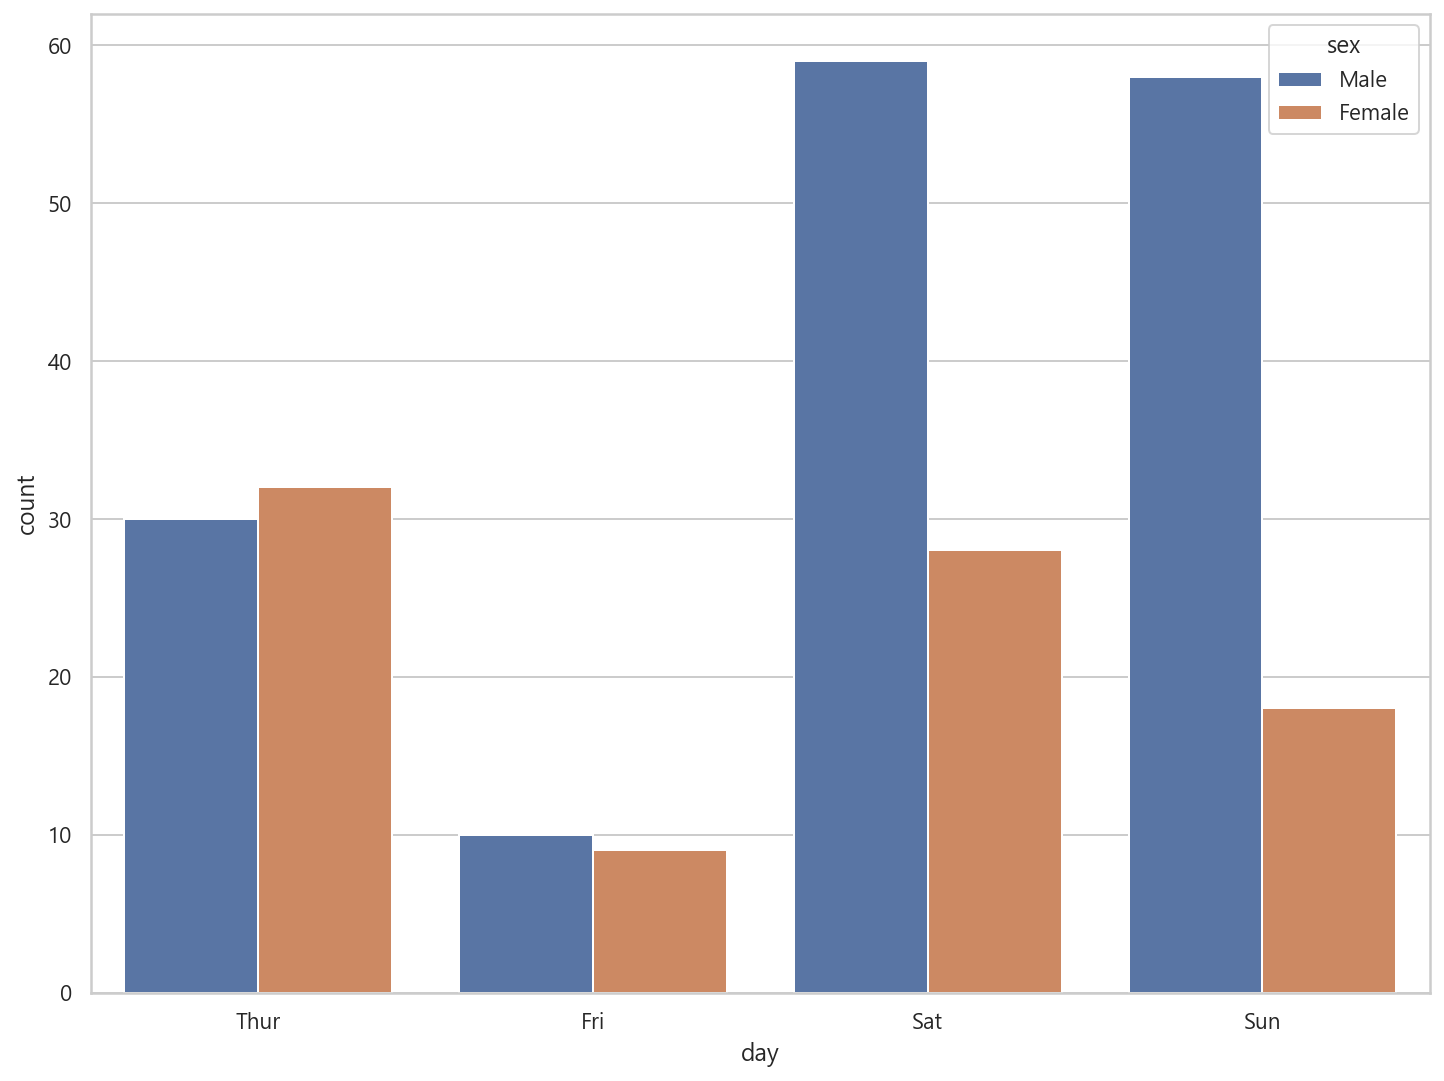

In [8]:
sns.countplot(x='day', hue='sex', data=tips)

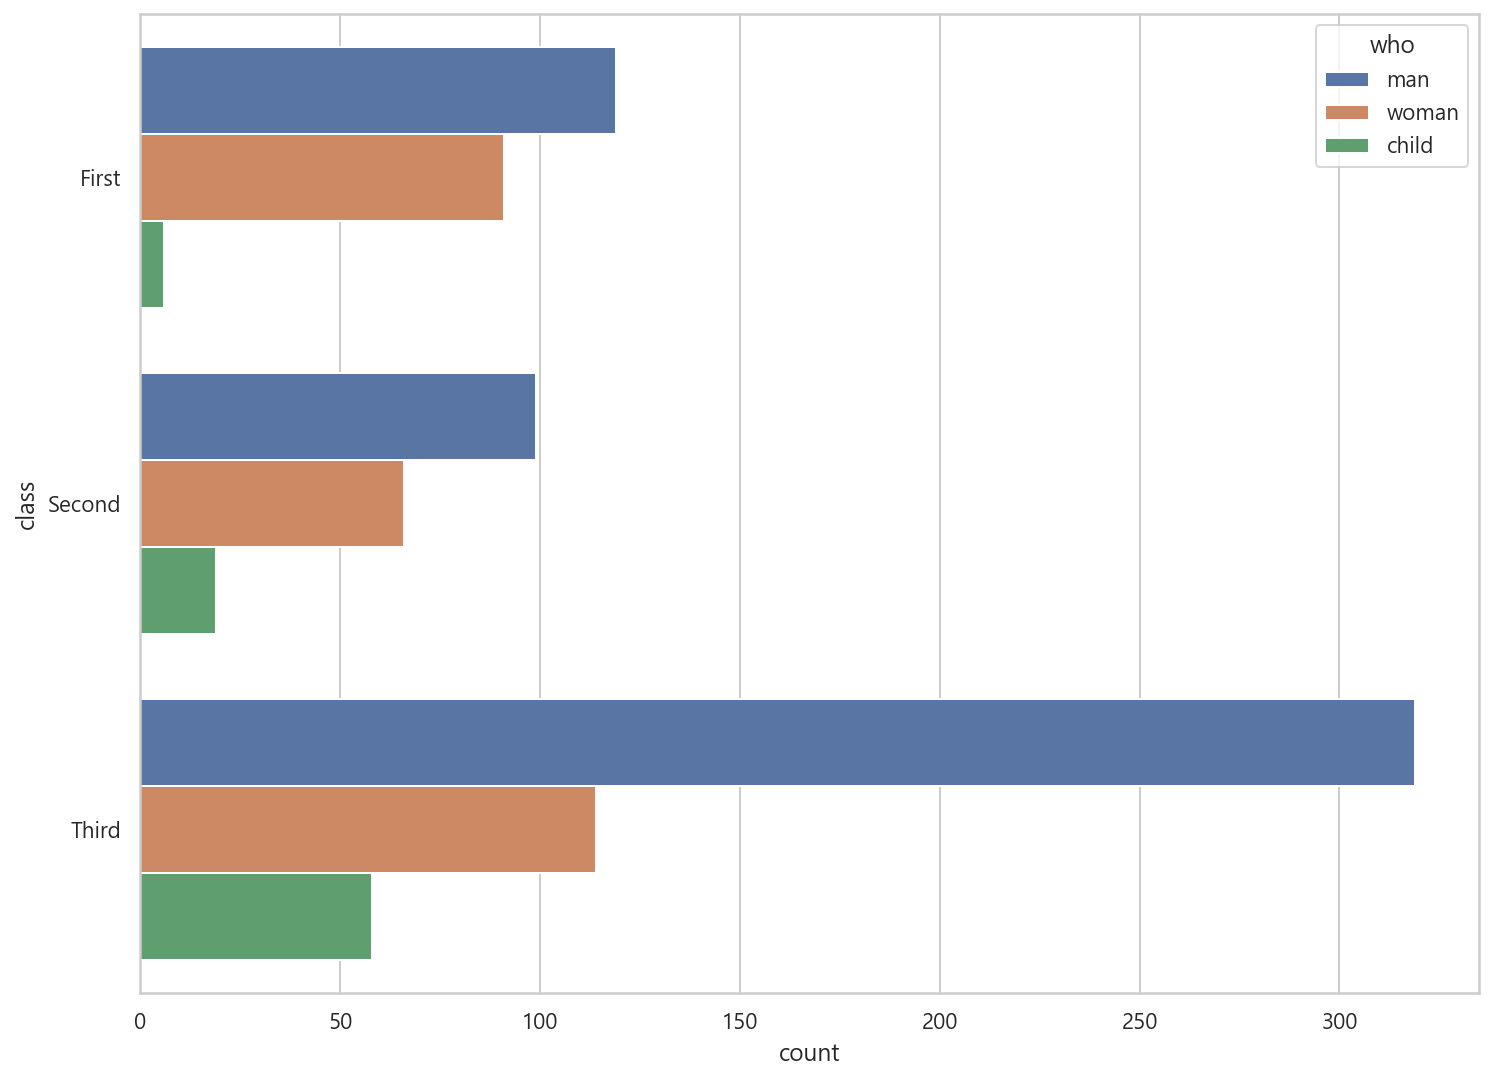

In [7]:
sns.countplot(y="class", hue="who", data=titanic)
plt.show()

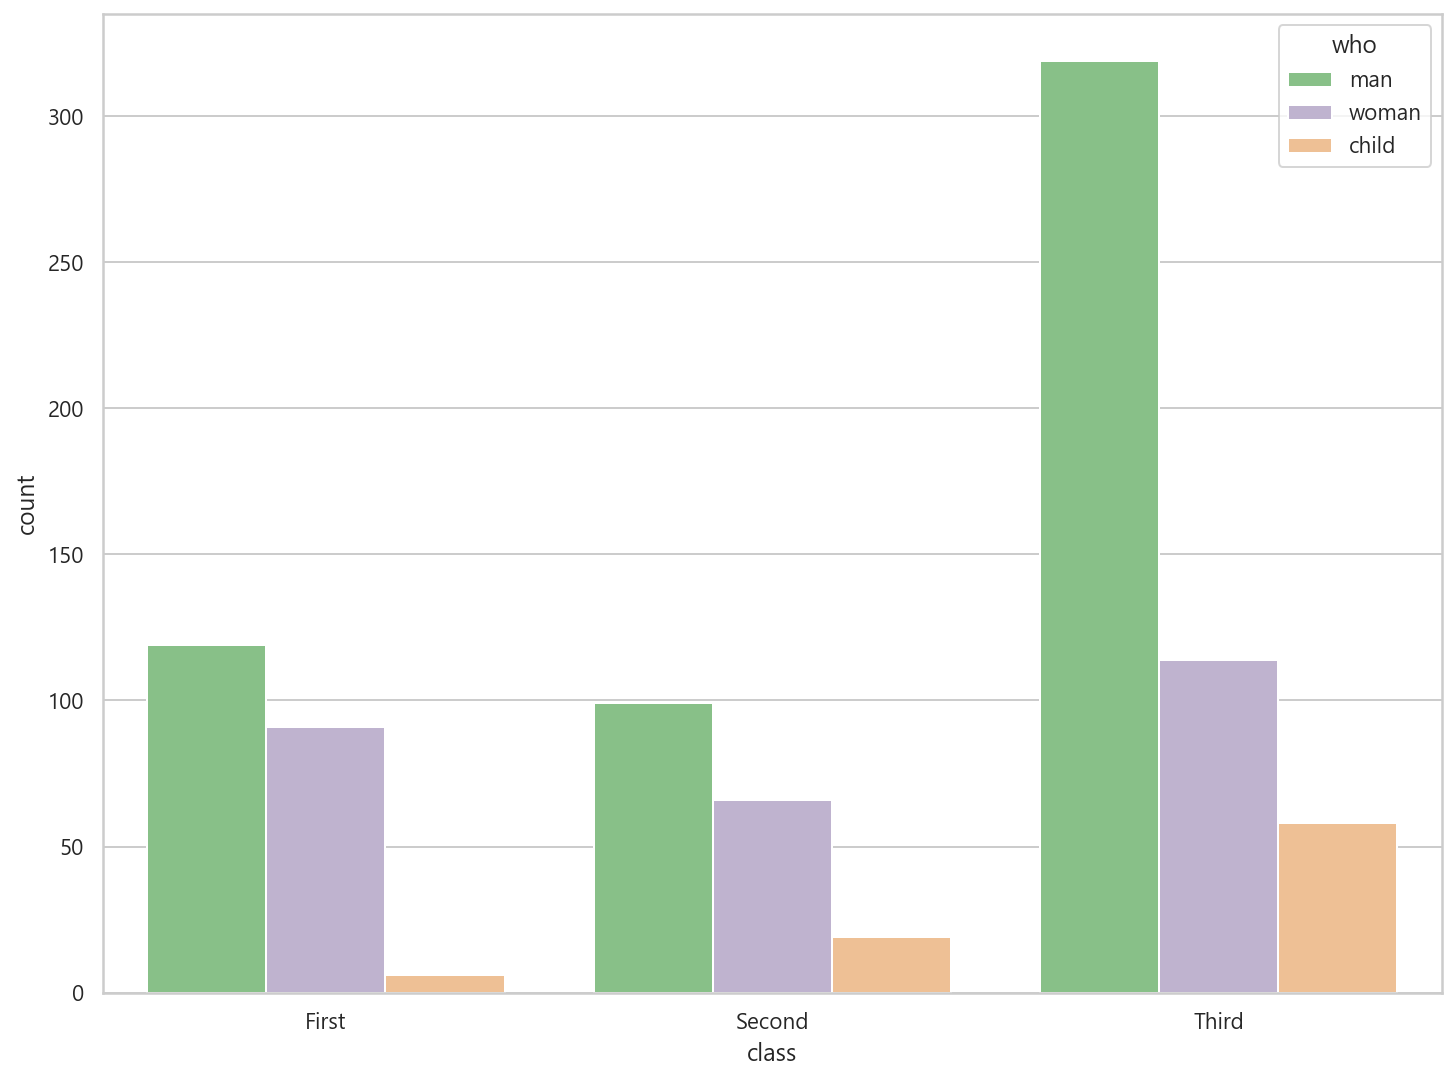

In [9]:
sns.countplot(x="class",hue='who',palette="Accent", data=titanic)
# palette 값 입력 오류시 사용가능한 palette명 표시, 예) palette="Accent111111"
plt.show()

In [ ]:
# seaborn color palette 사용 
#참조사이트 :https://www.geeksforgeeks.org/seaborn-color-palette/
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.palplot(sns.color_palette("Greys"))
sns.palplot(sns.color_palette("terrain_r", 7))
sns.palplot(sns.color_palette("deep", 10))
sns.palplot(sns.color_palette("muted", 10))
sns.palplot(sns.color_palette("bright", 10))
sns.palplot(sns.color_palette("dark", 10))

## 2.relplot
- 두 comumn간의 상관관계를 보여줌

0.6757341092113641


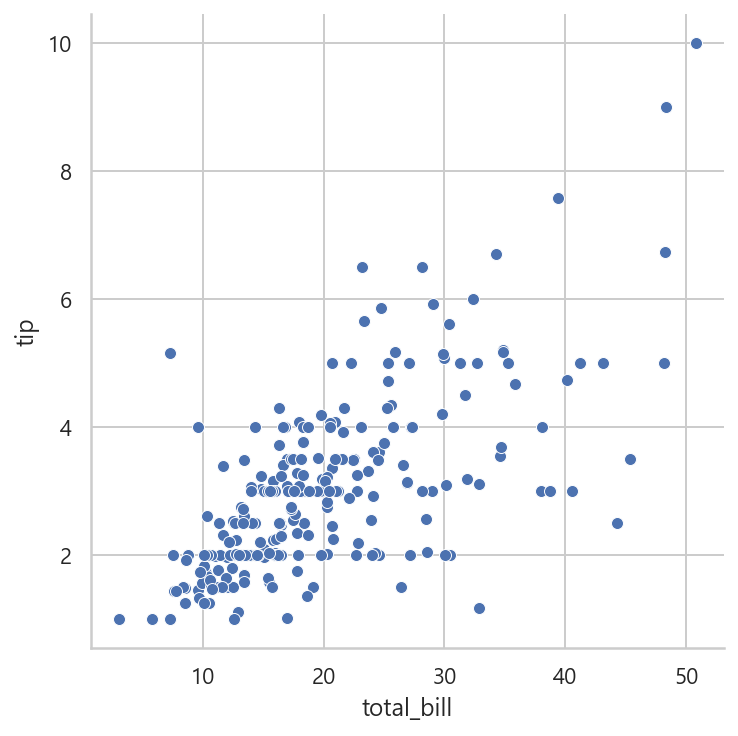

In [14]:
# sns.relplot(x='x축으로 사용할 필드', y='y축으로 사용할 필드', data='dataFrame')
print(tips.total_bill.corr(tips.tip))
sns.relplot(x='total_bill', y='tip', data=tips)
# sns.scatterplot(x='totla_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

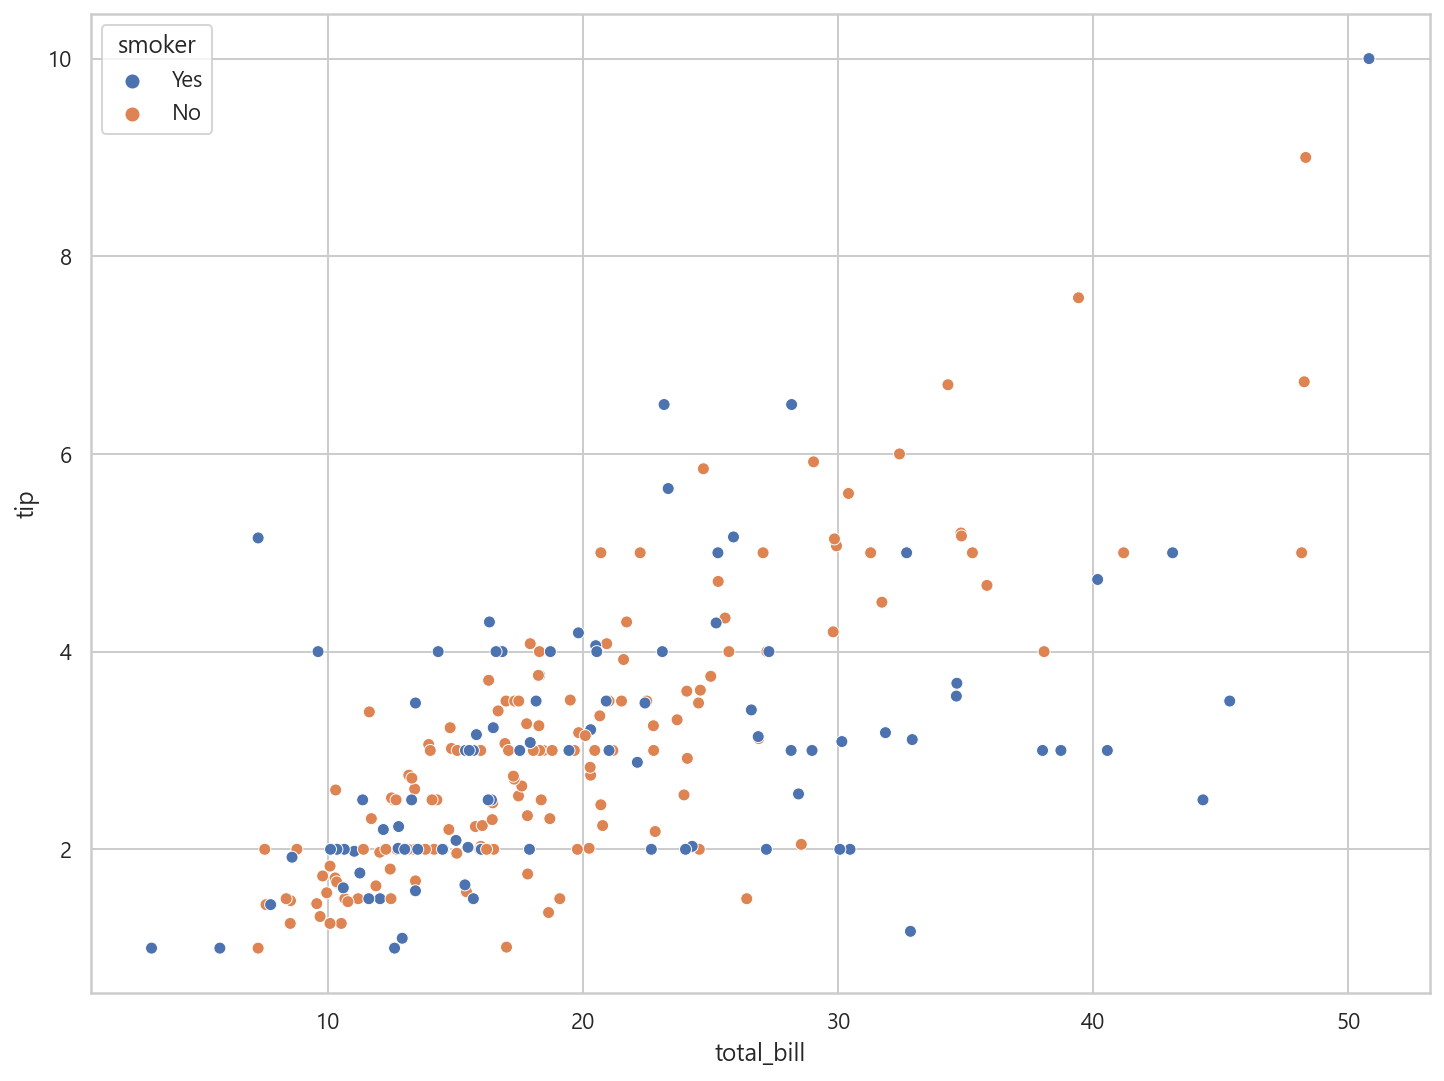

In [45]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='smoker')

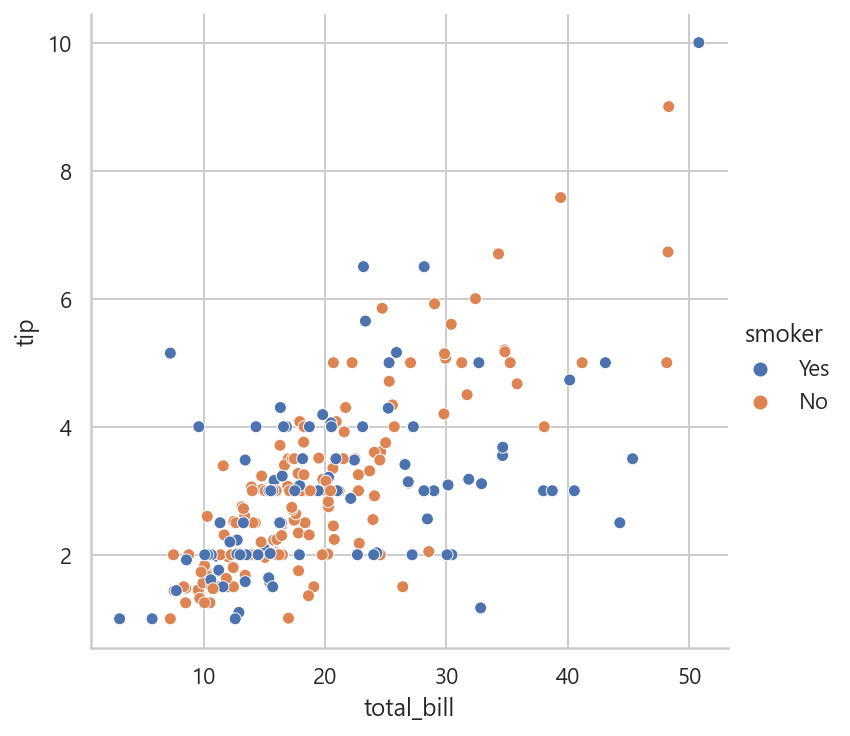

In [17]:
# hue 색상:범주형데이터
sns.relplot(x='total_bill', y='tip', data=tips, hue='smoker')

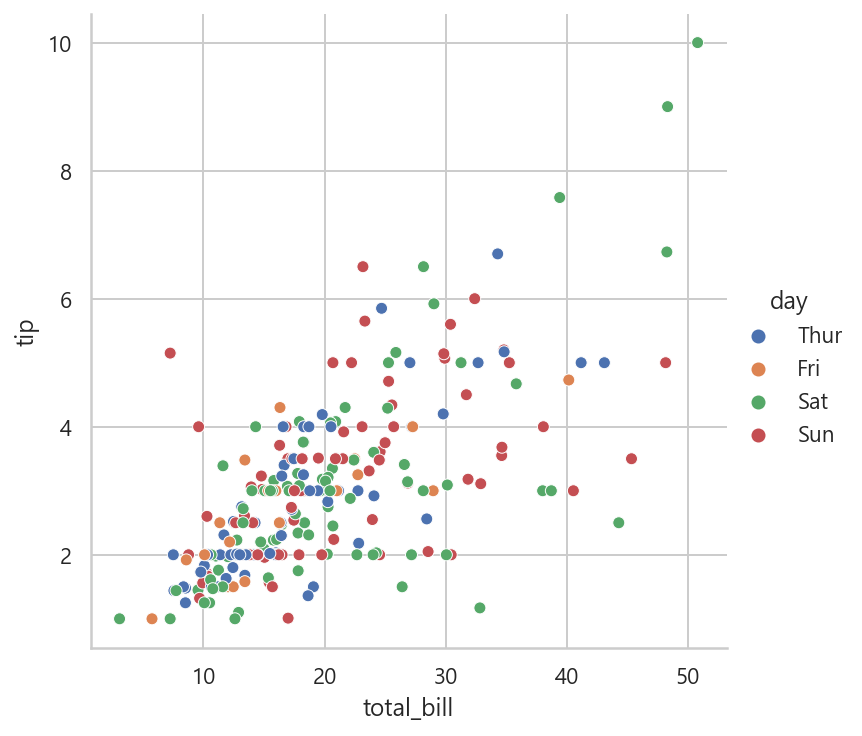

In [46]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
plt.show()

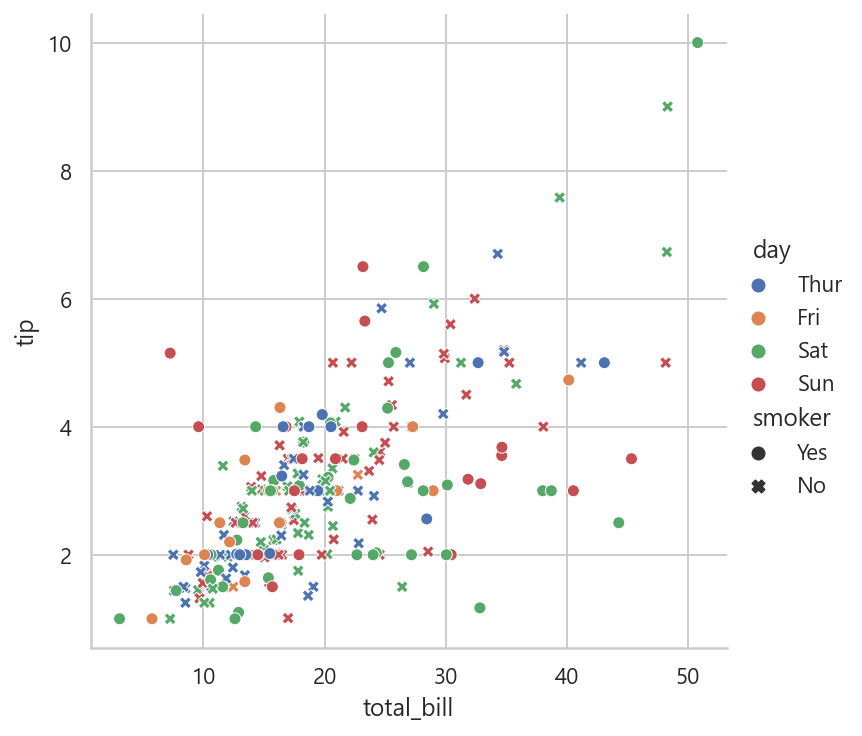

In [20]:
# hue 색상 : 수치형 데이터
sns.relplot(x='total_bill', y='tip', data=tips, hue='day', style='smoker')

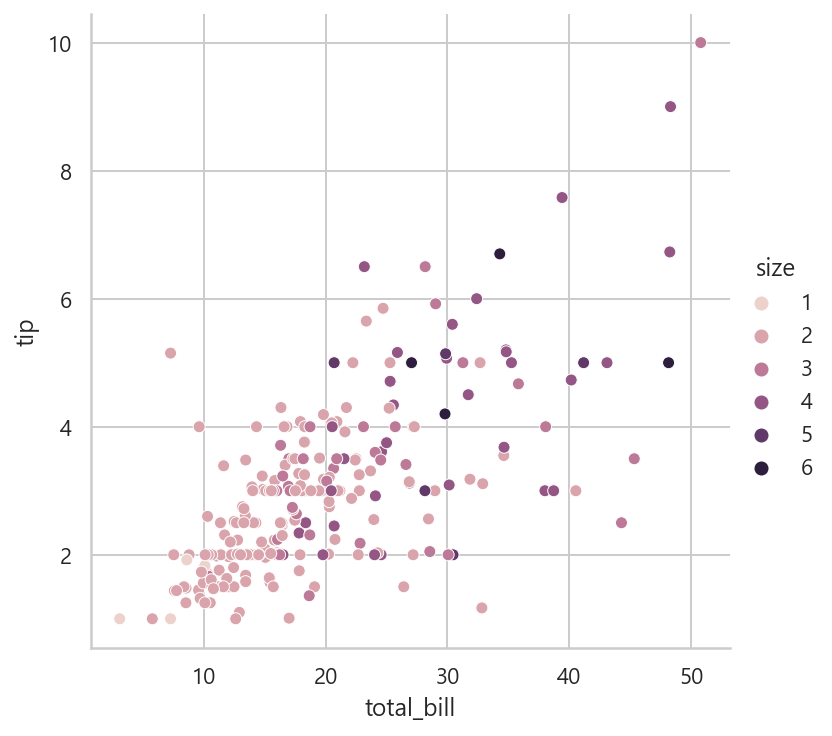

In [19]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='size')

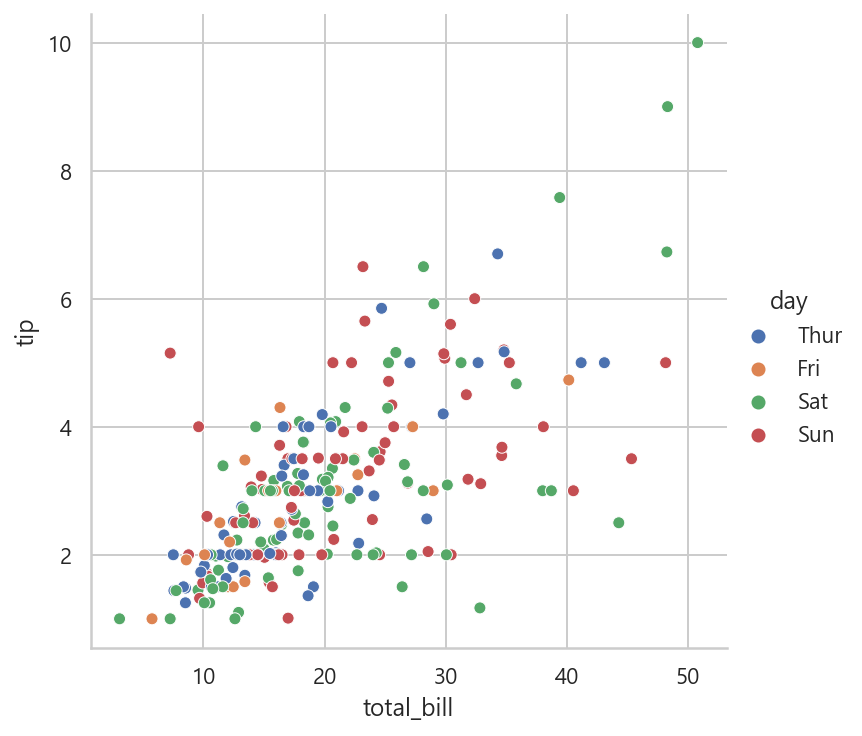

In [18]:
sns.relplot(x='total_bill', y='tip', hue='day', data=tips)
plt.show()

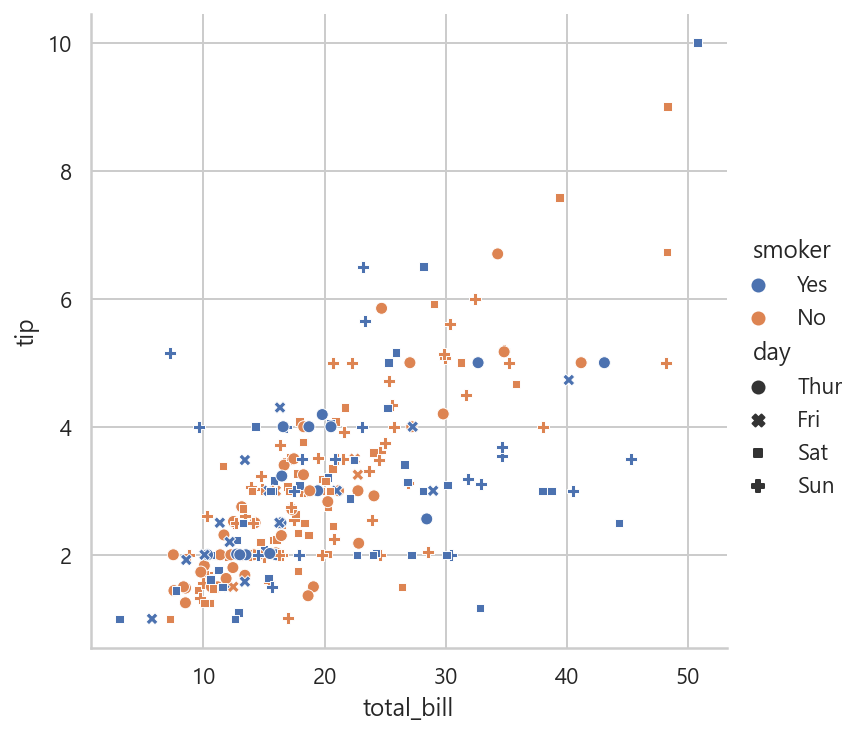

In [47]:
# style & hue
sns.relplot(x='total_bill', y='tip', data=tips, style='day', hue='smoker')

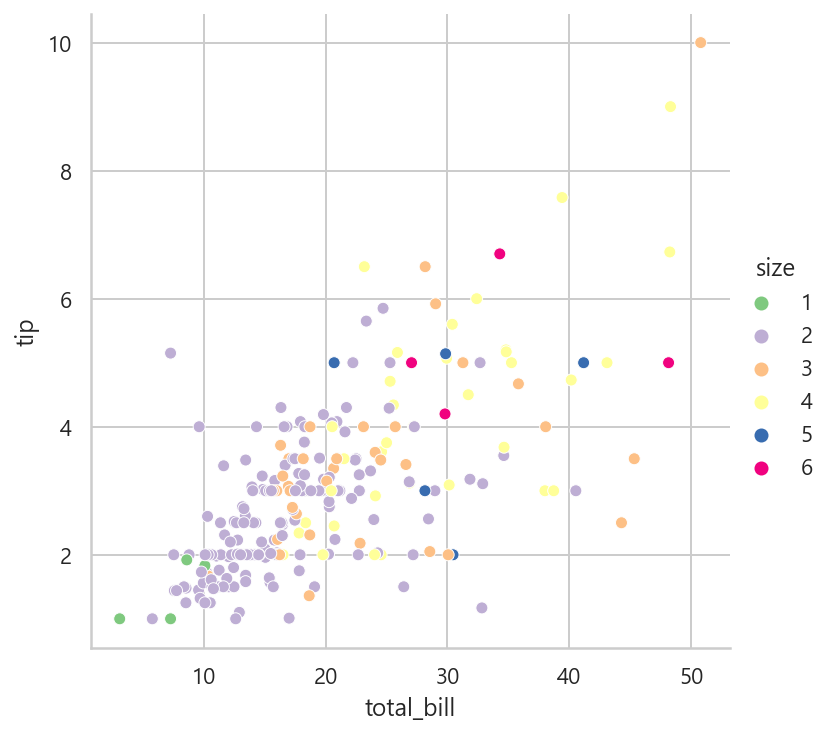

In [21]:
sns.relplot(x='total_bill', y='tip', data=tips, palette="Accent" ,hue='size')

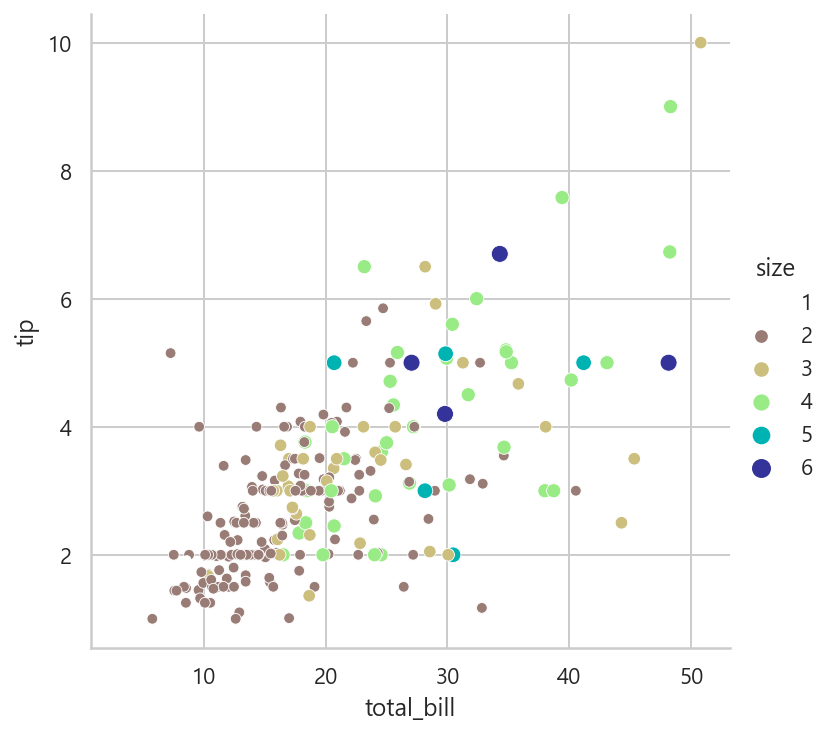

In [23]:
# 마크의 크기 설정
sns.relplot(x='total_bill', y='tip', data=tips, palette="terrain_r" ,size='size', hue='size')

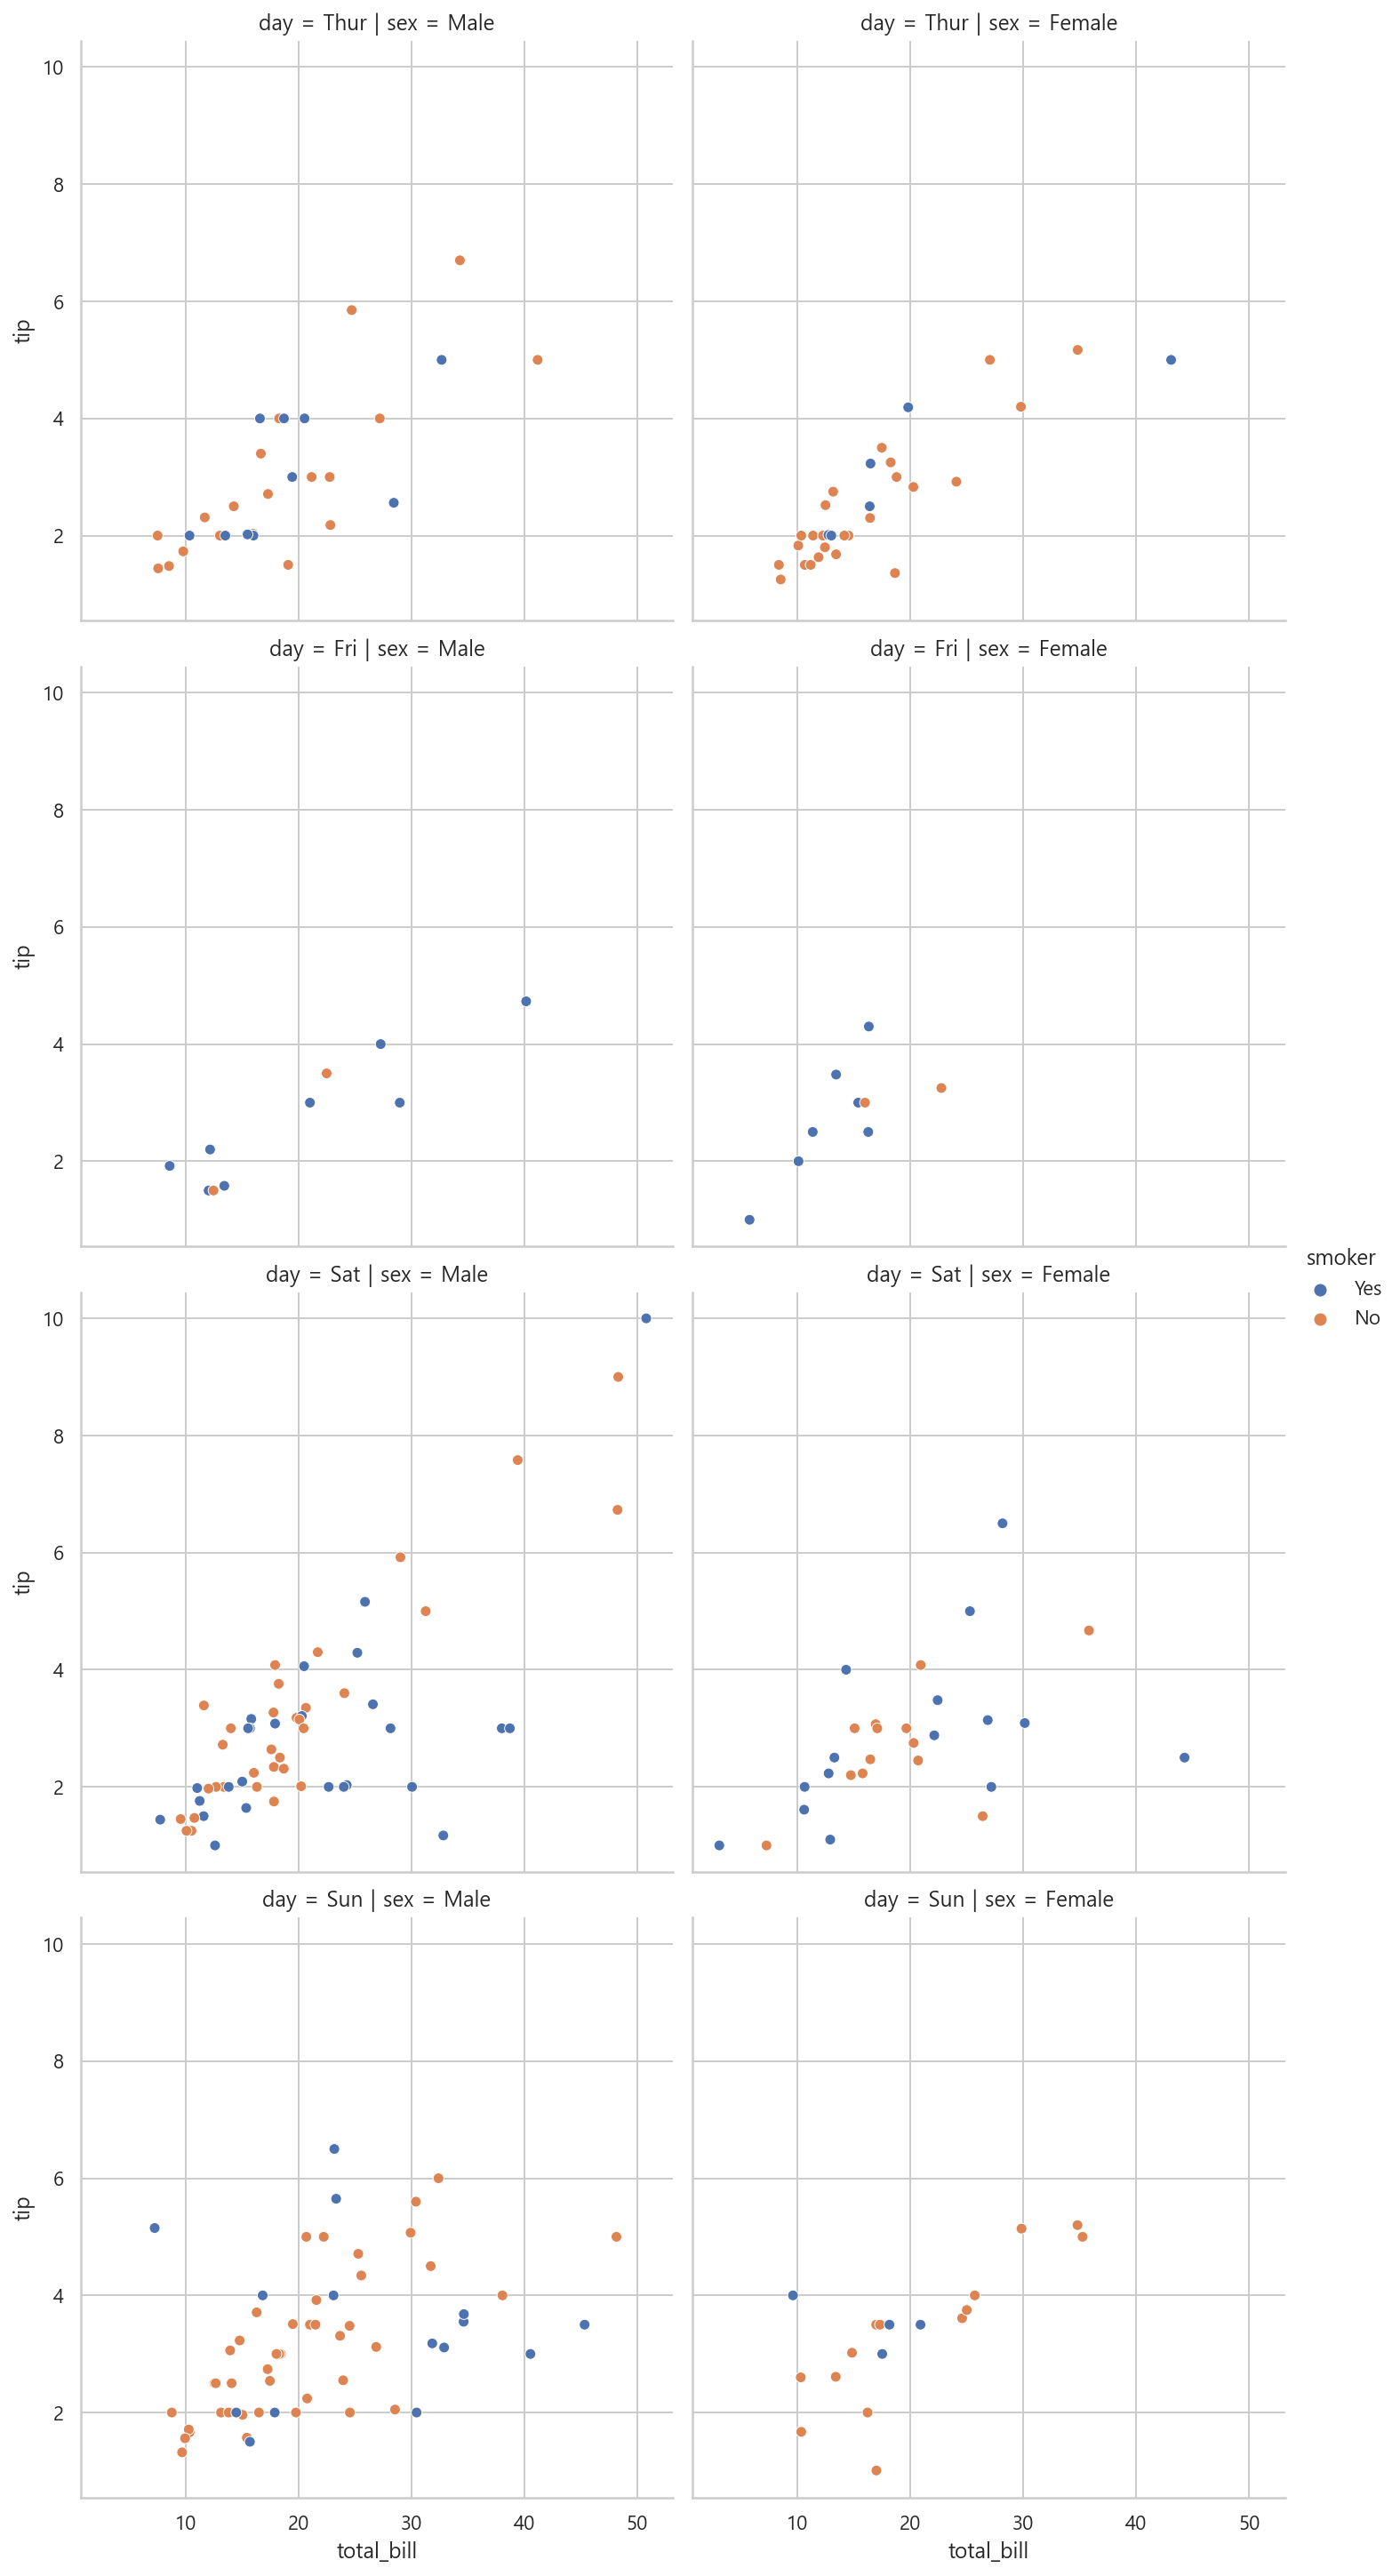

In [49]:
# row와 column에 표기할 데이터 column 선택하여 표현가능
sns.relplot(x='total_bill', y='tip', data=tips, row='day', col='sex', hue='smoker')
plt.show()

In [25]:
# relplot로 line 그래프 그리기
df=pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
df

,time,value
0,0,0.350082
1,1,0.966808
2,2,0.207161
3,3,-0.340750
4,4,-0.096531
...,...,...
495,495,-20.248244
496,496,-19.792733
497,497,-21.074986
498,498,-22.014350


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


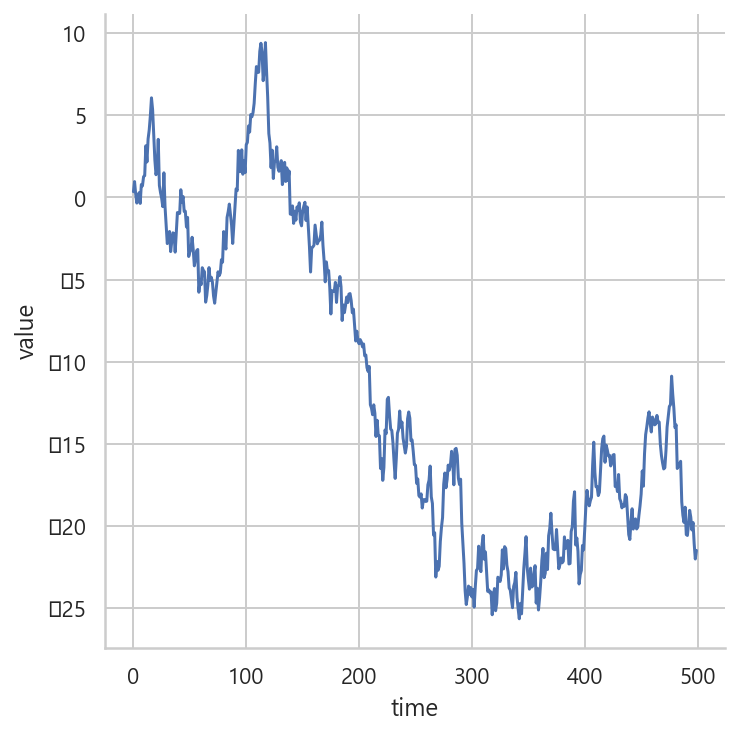

In [50]:
sns.relplot(x='time', y='value', data=df, kind='line')

In [27]:
fmri=sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


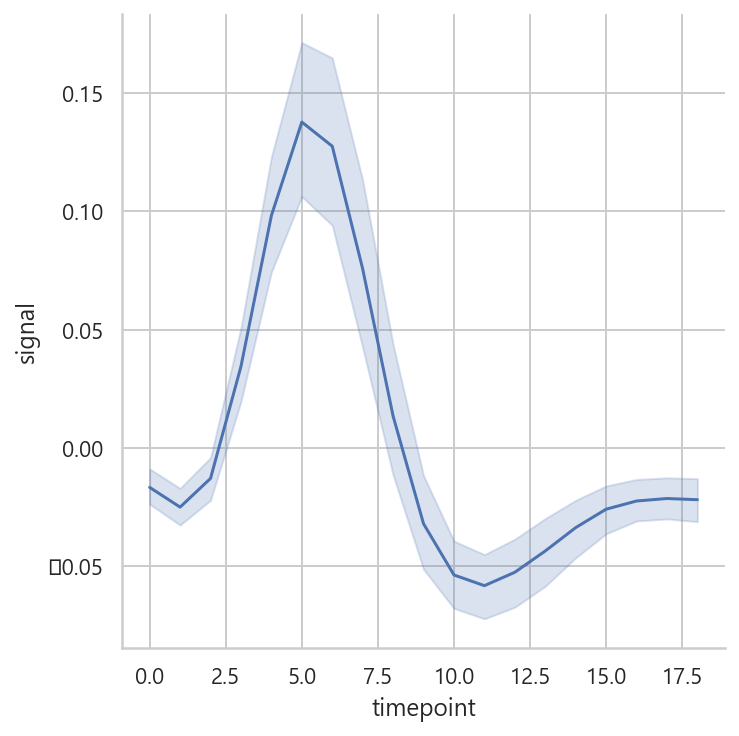

In [52]:
# 95% 95% 신뢰구간 보여줌
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


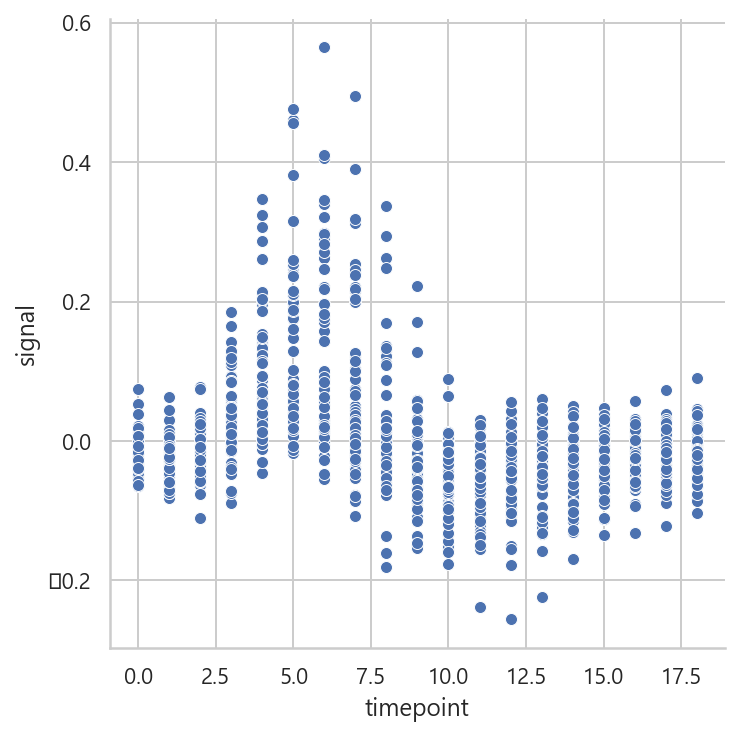

In [53]:
sns.relplot(x='timepoint', y='signal', data=fmri)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


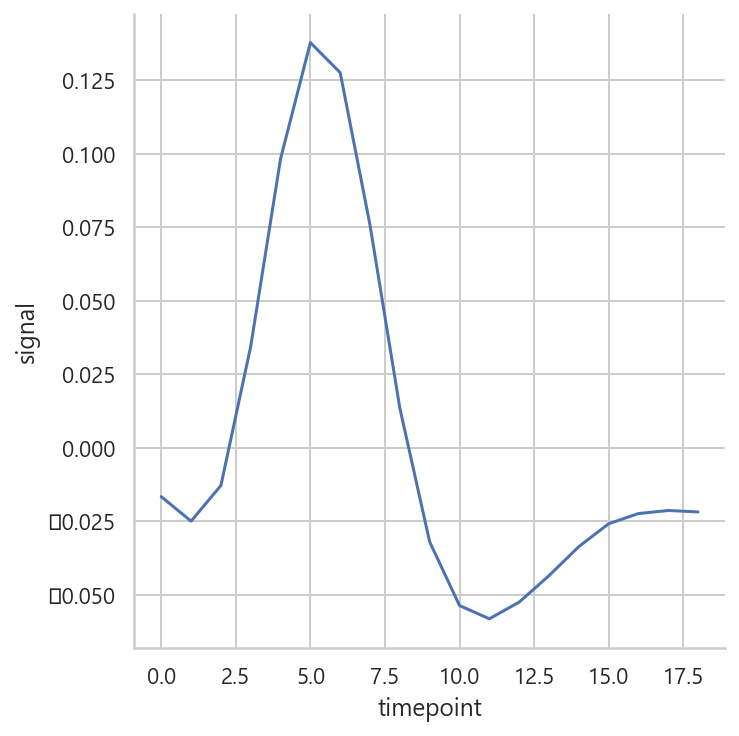

In [32]:
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', ci=None)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


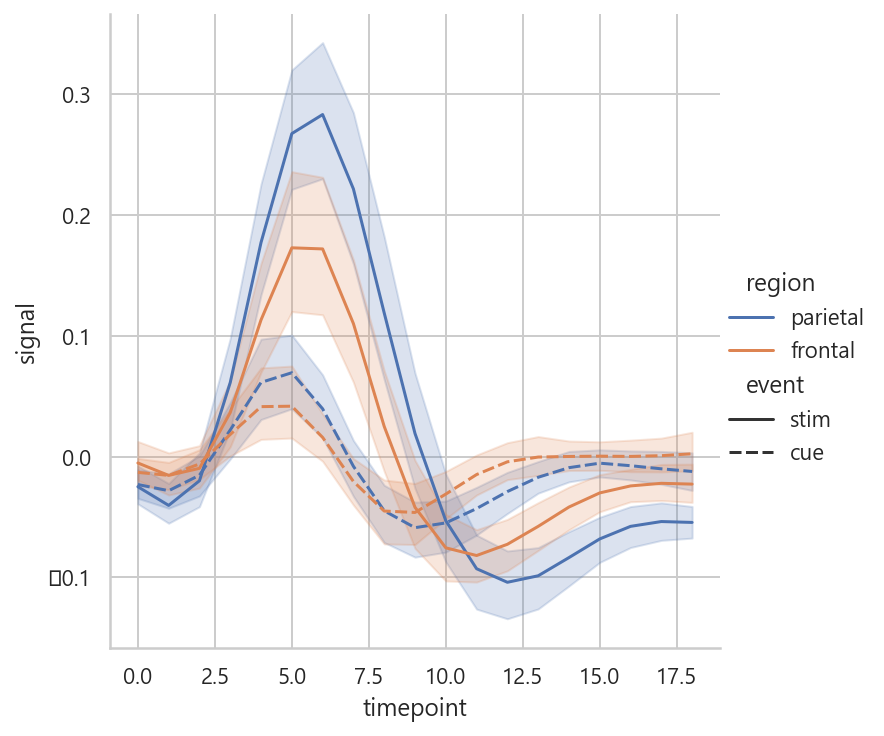

In [54]:
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', hue='region', style='event')

## 3.distplot
- matplotlib의 hist 그래프와 kdeplot(ked: Kernel Density Estimation)을 통합한 그래프이며, 분포와 밀도를 확인할 수 있다.

In [33]:
# histplot을 구현하기 위한 샘플 데이터를 생성
x = np.random.randn(100)
x

array([-0.18361183, -0.38731797, -1.30443184,  0.99736018, -0.66998358,
        0.73222476, -0.87107375, -0.63626439, -0.65014063,  0.01513476,
       -1.20589958,  0.10342433, -0.64231238,  0.01676805, -0.13707752,
        0.74199406, -0.69316799,  1.29226598, -1.61960366,  0.08891882,
        0.13443444,  1.05434491, -0.19217974,  0.18739716, -0.45401988,
        0.89358068,  0.0790256 ,  0.32979902,  0.16529394, -0.98435703,
        0.78167584, -1.30491425, -1.33149776,  1.58817607,  1.42028444,
       -0.51339441,  1.18558616,  1.69011164,  0.98770936,  1.54244031,
       -0.02118863, -0.00370351, -0.37539513,  0.51826722,  0.3163314 ,
        0.15932326,  1.34620291, -1.60963281, -1.00935919,  0.07719808,
       -1.97771989, -1.46183953,  0.32420533, -0.14754568, -0.97184692,
        0.55221424,  0.20697185,  1.51298533, -0.16764212,  0.42184282,
        0.52268894, -0.53589805,  0.85166881, -0.35340886,  0.18174005,
        0.15070209, -1.39907906,  0.86964583,  0.59325977, -1.03

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


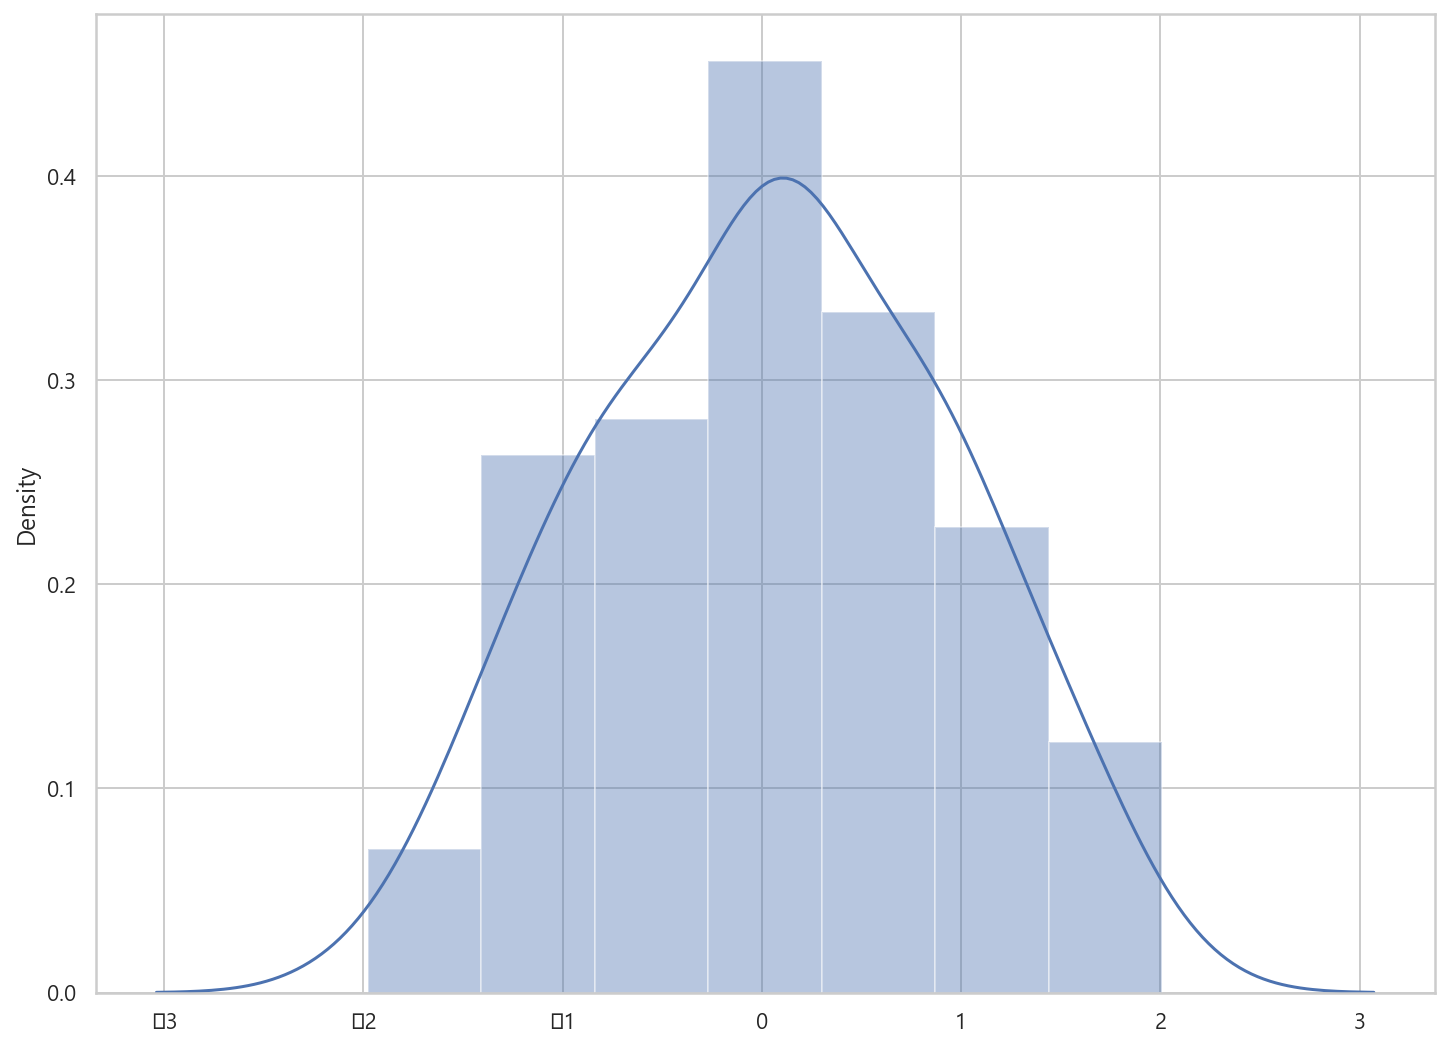

In [55]:
sns.distplot(x)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


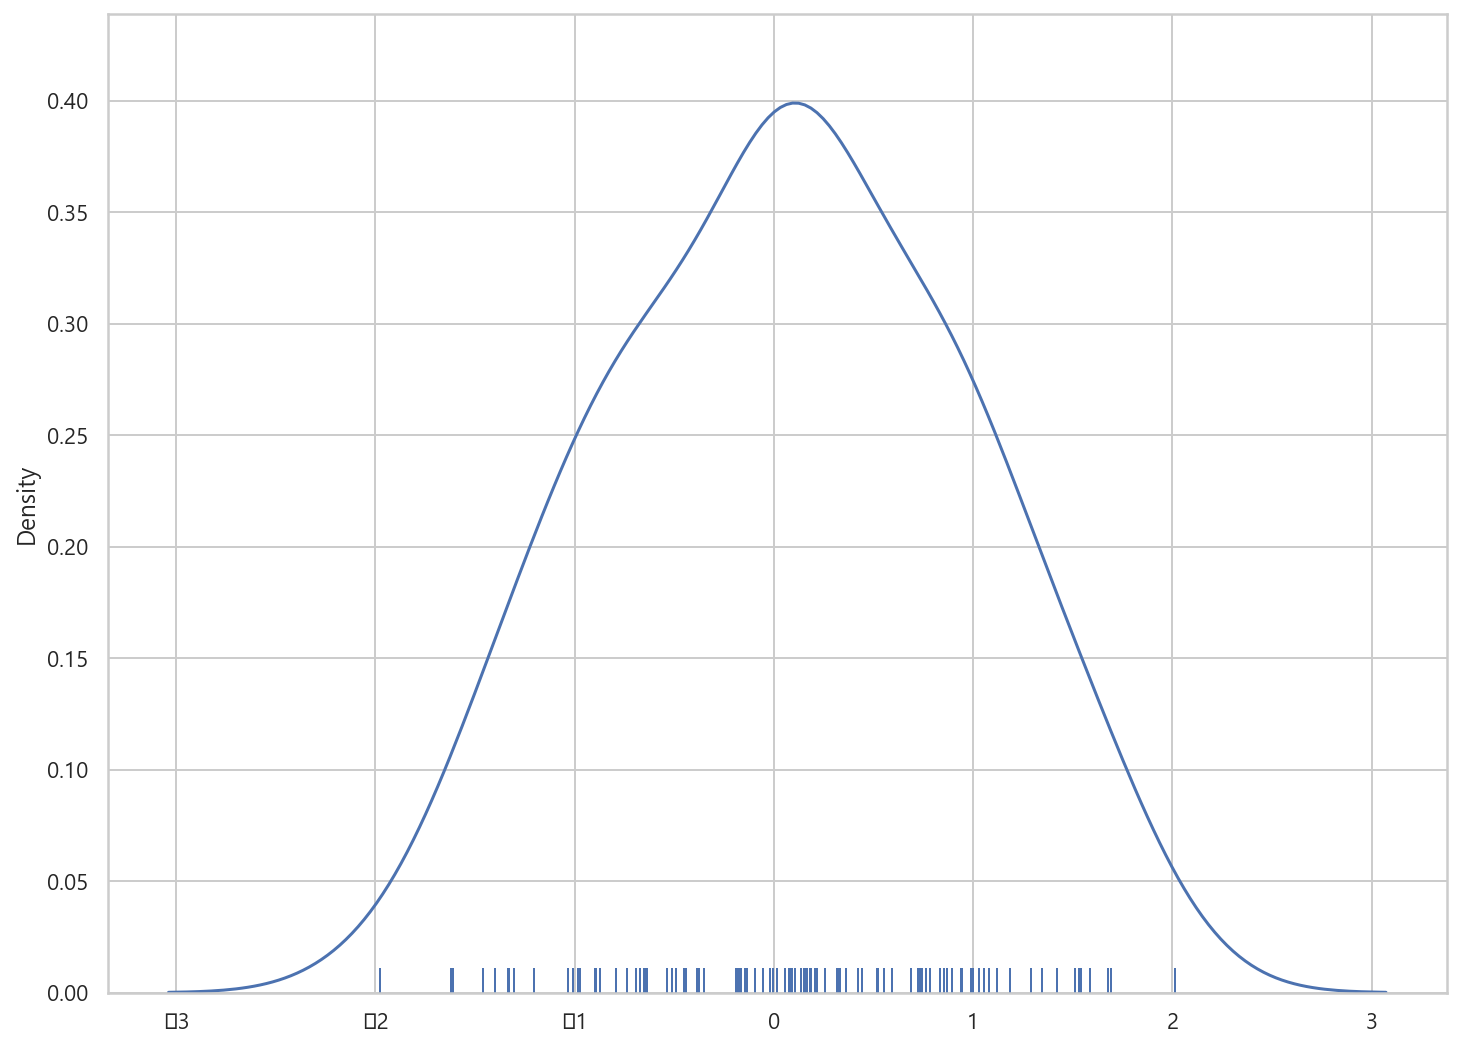

In [57]:
sns.distplot(x, rug=True, hist=False, kde=True)

<AxesSubplot:ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


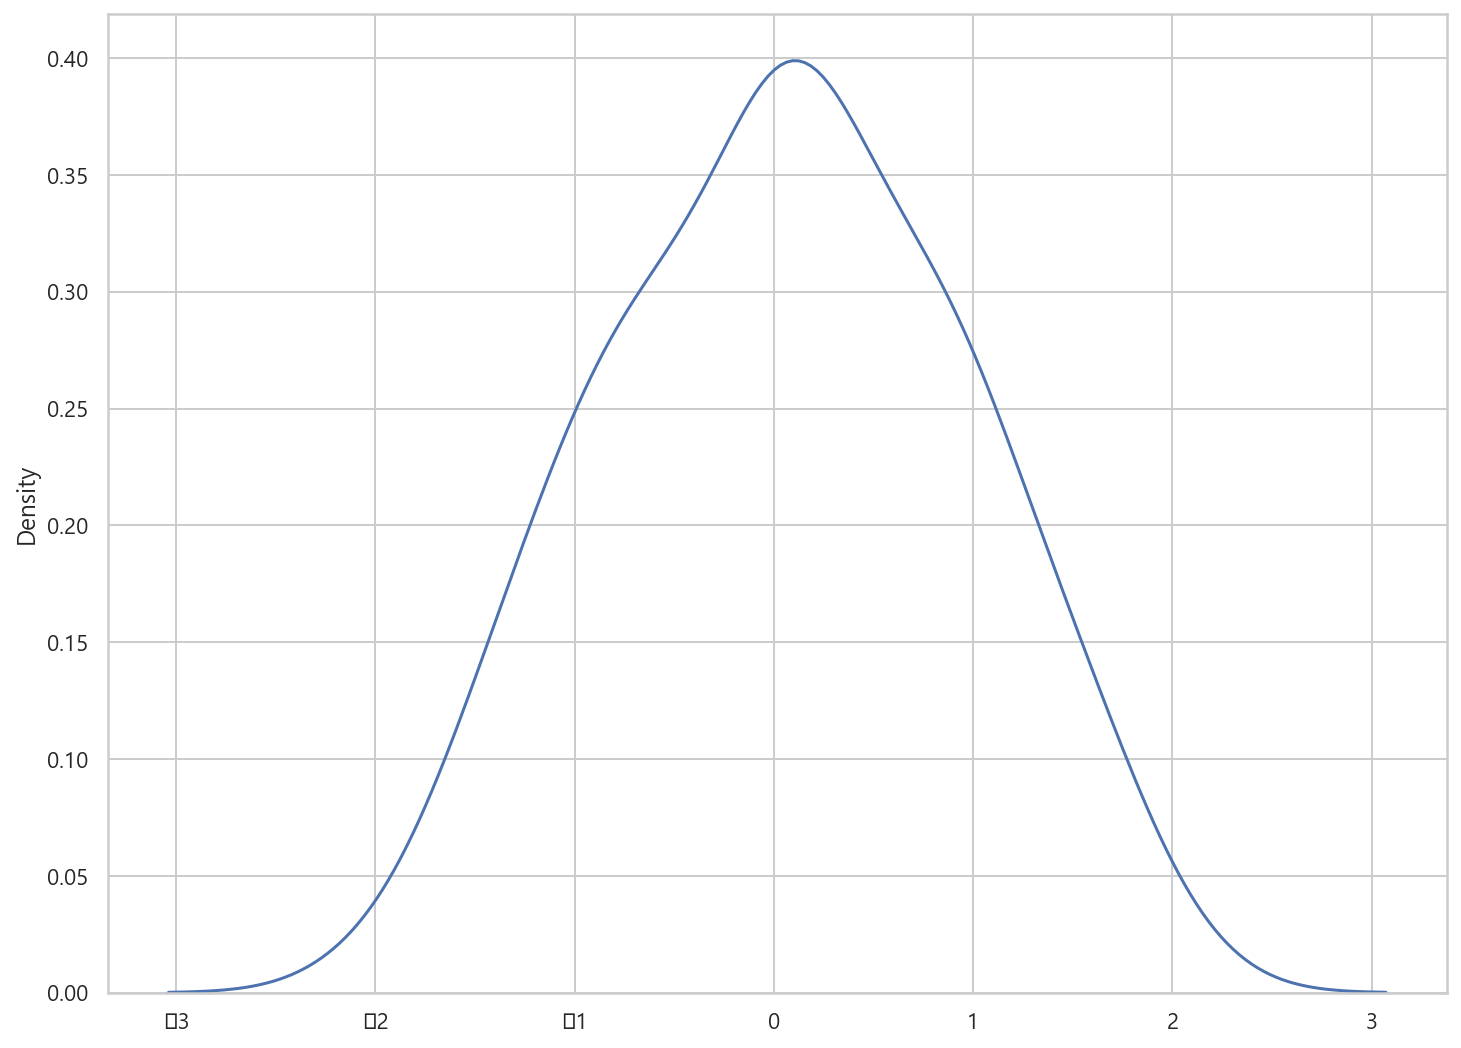

In [37]:
sns.kdeplot(x)

(array([ 3.,  7., 10., 13., 13., 19., 12., 13.,  7.,  3.]),
 array([-1.97771989, -1.57889182, -1.18006375, -0.78123569, -0.38240762,
         0.01642044,  0.41524851,  0.81407658,  1.21290464,  1.61173271,
         2.01056077]),
 <BarContainer object of 10 artists>)

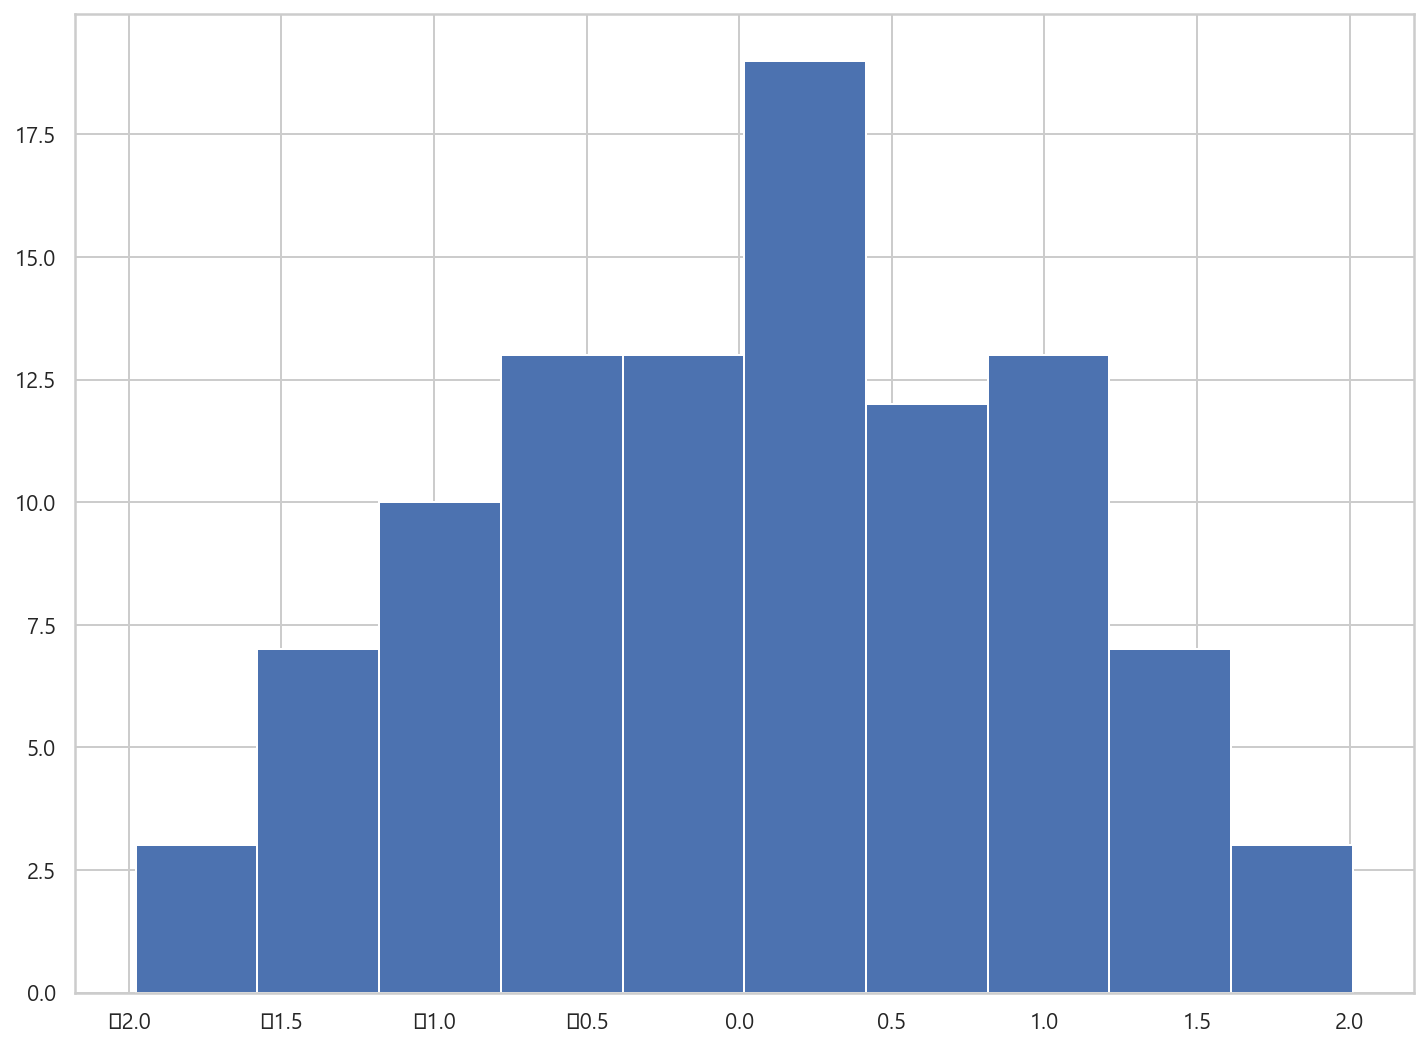

In [58]:
plt.hist(x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


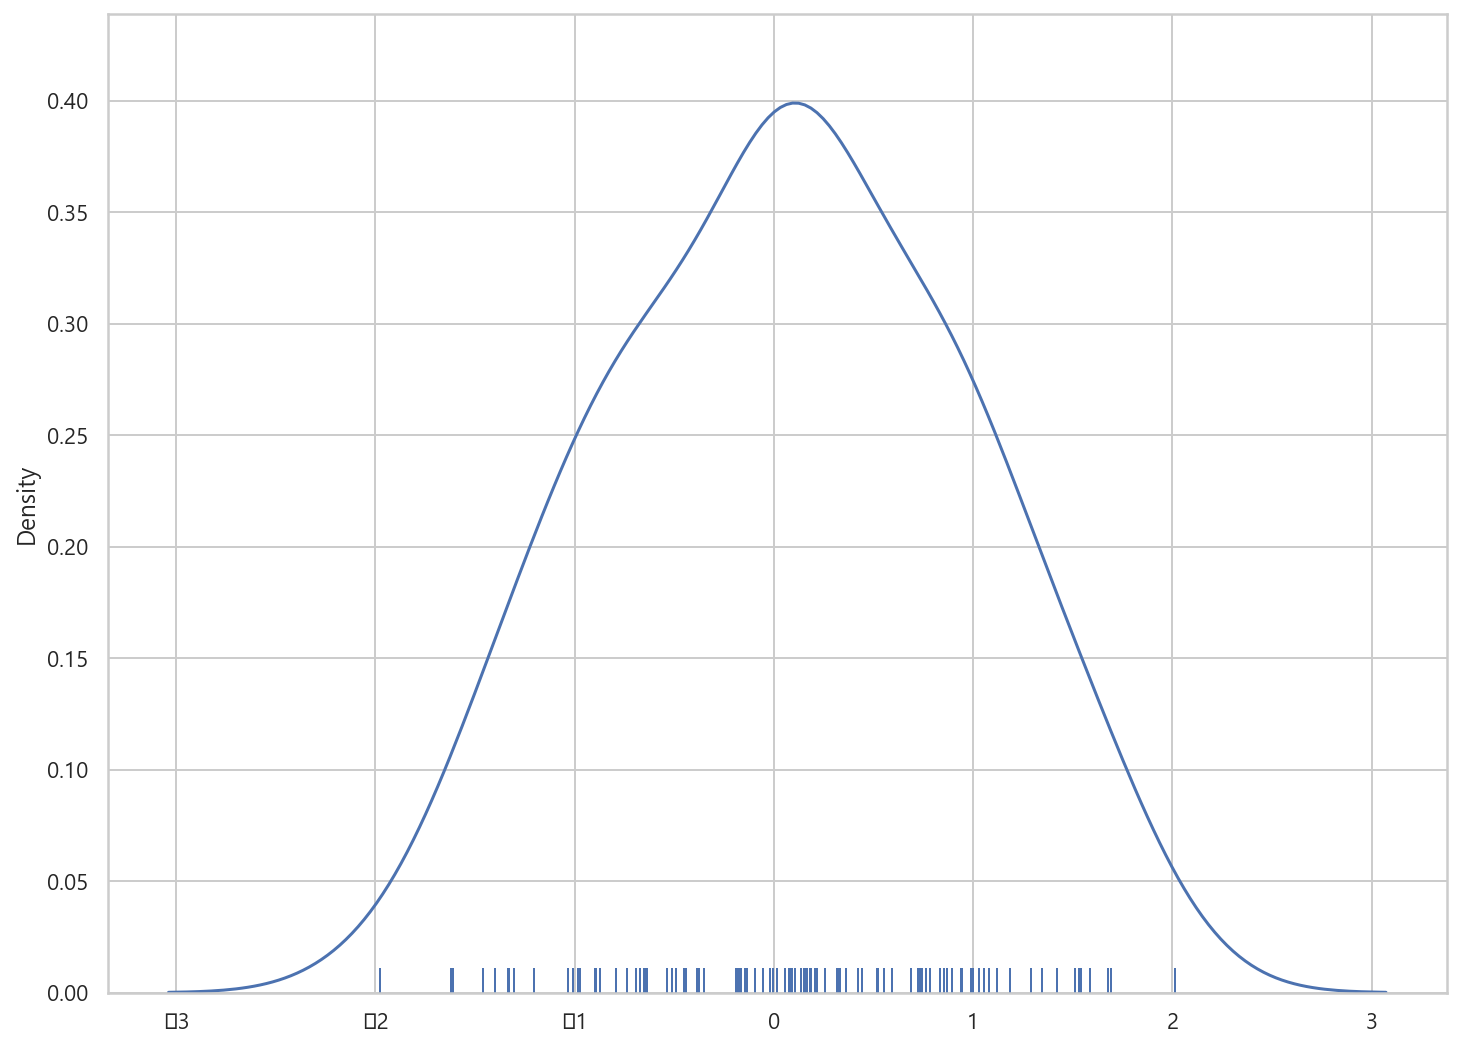

In [36]:
#rugplot
#rug는 rugplot으로도 불리우며, 데이터 위치를 x축 위에 **작은 선분(rug)으로 나타내어
# 데이터들의 위치 및 분포**를 보여준다.
sns.distplot(x, rug=True, hist=False, kde=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


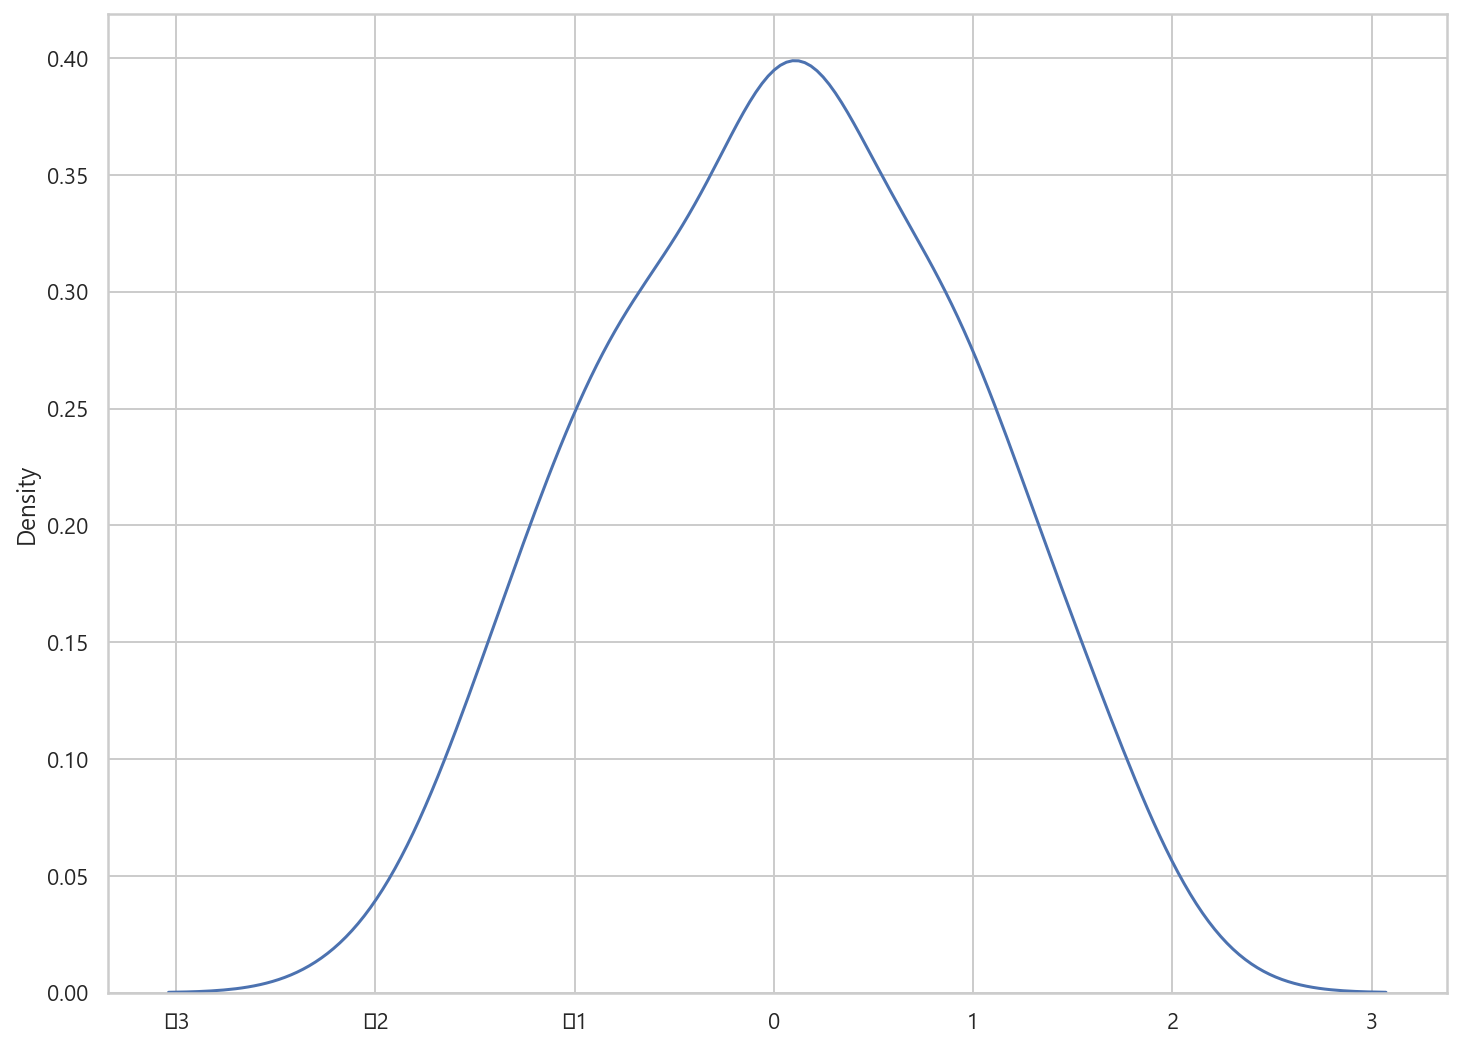

In [60]:
# kde(kernel density) plot
# kde는 histogram보다 부드러운 형태의 분포 곡선을 보여주는 방법
sns.distplot(x, rug=False, hist=False, kde=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


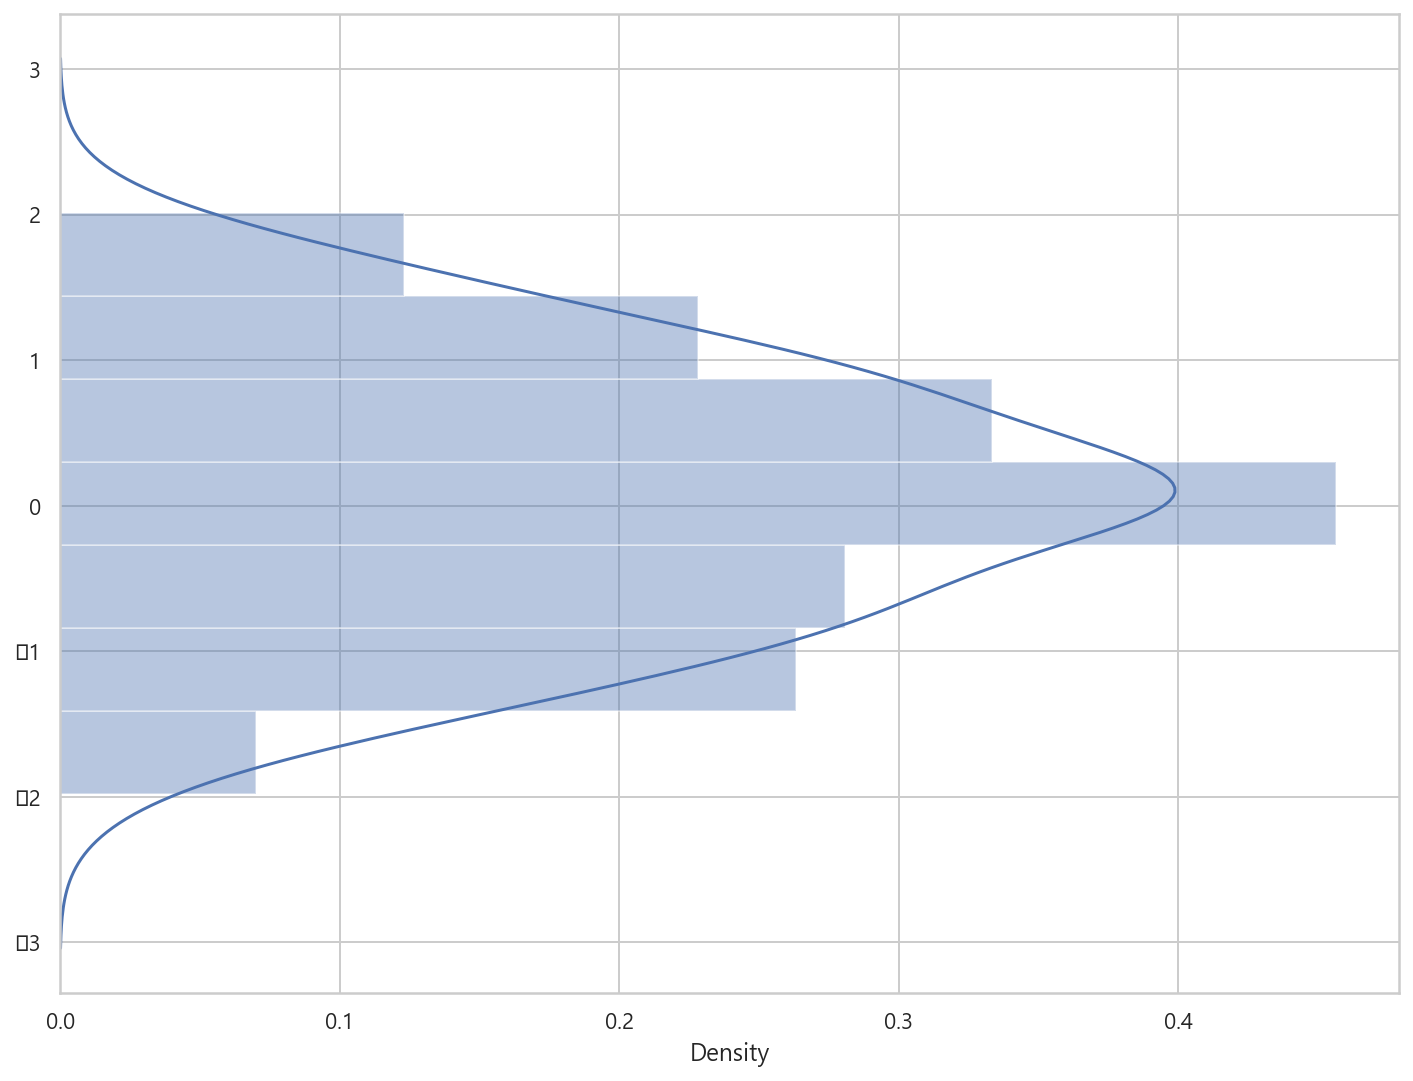

In [38]:
# 가로로 표현하기
sns.distplot(x, vertical=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


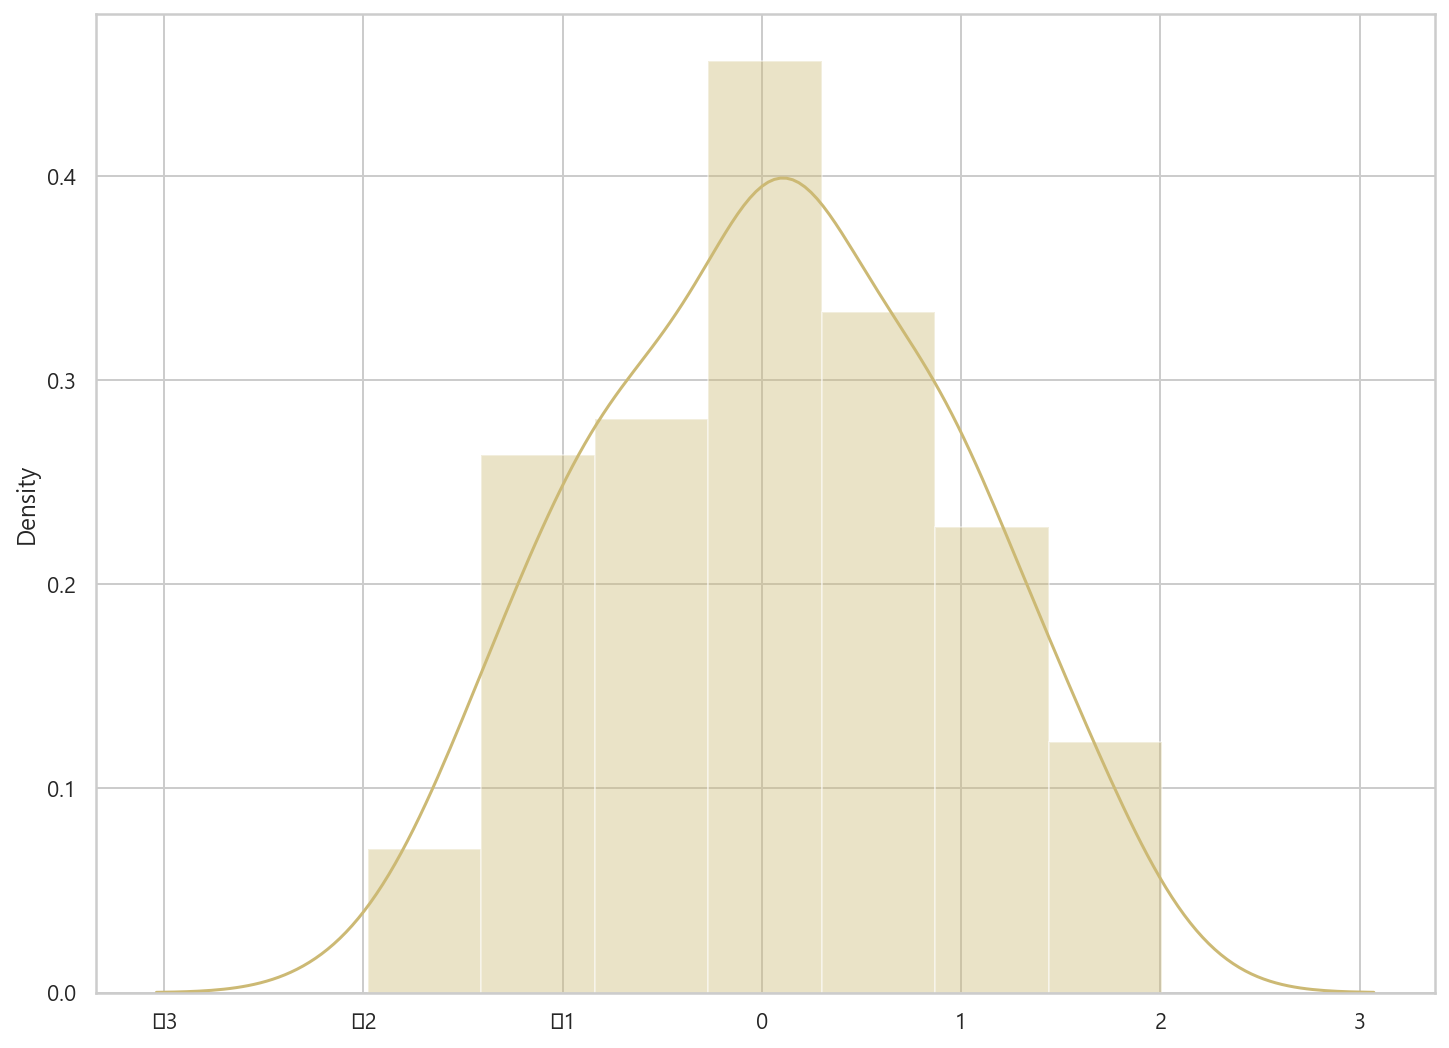

In [39]:
# 컬러 변경하기 color : r,g,b,c,m,y 가능
sns.distplot(x, color="y")
plt.show()

## 4. heatmap
- 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열분포 형태의 비쥬얼한 그래픽으로 출력 가능하다.

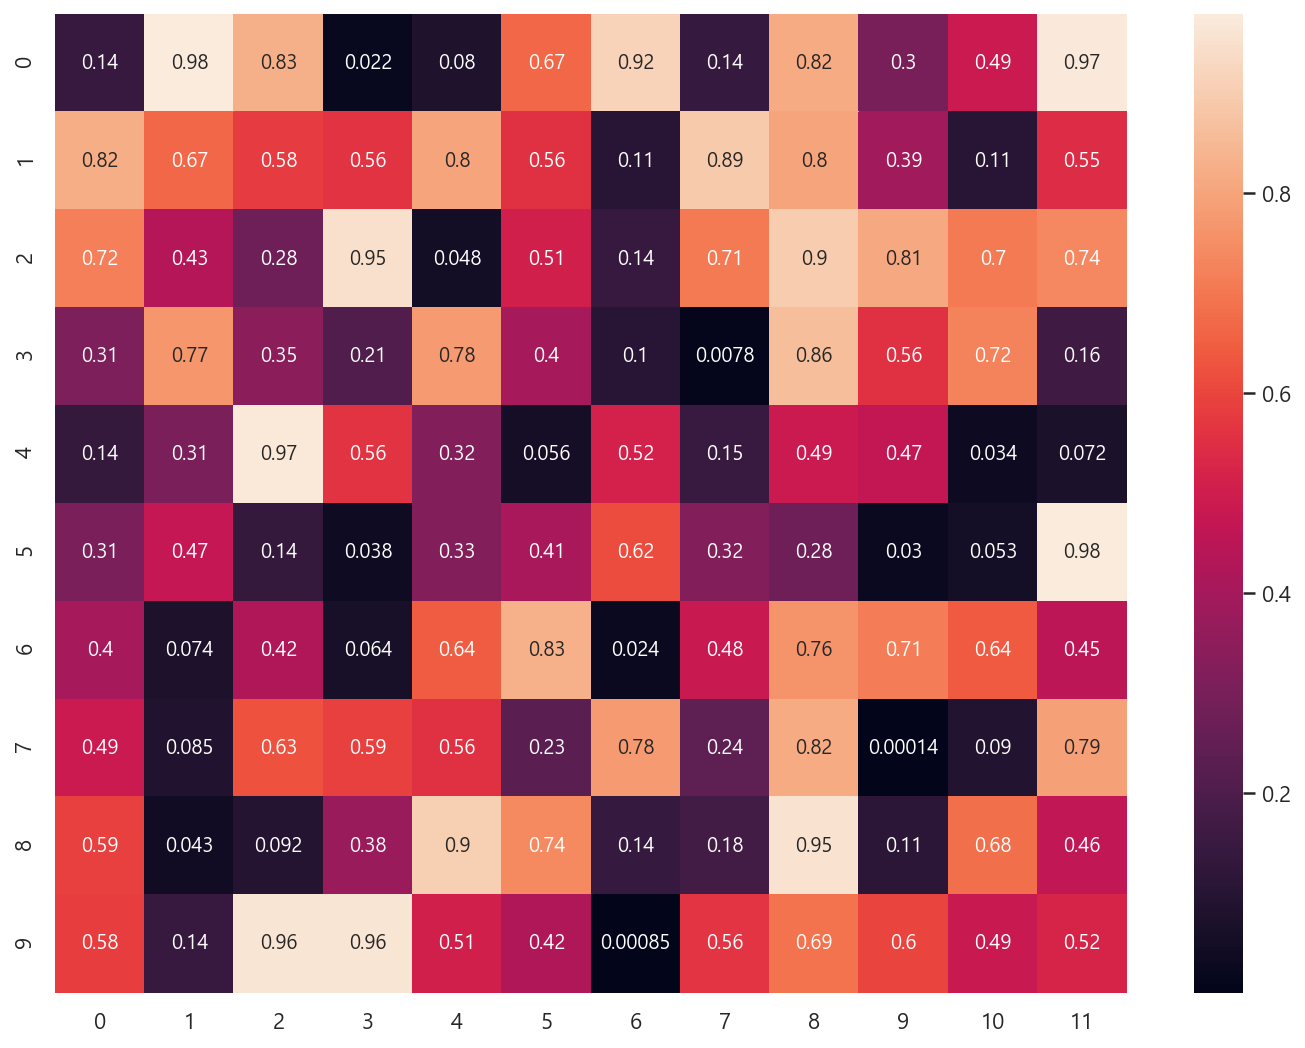

In [40]:
# 기본 heatmap
heatmap_data = np.random.rand(10,12)
sns.heatmap(heatmap_data, annot=True) # annot=True로 해야 수치 표현도 가능
plt.show()

- pivot table을 활용해서 heatmap을 그릴 수 있다
- 위에서 불러왔던 tips 데이터를 pivot table 형태로 가공 후 heatmap으로 표현해보자.

In [41]:
pivot = tips.pivot_table(index='day', columns='size', values='tip')
pivot

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


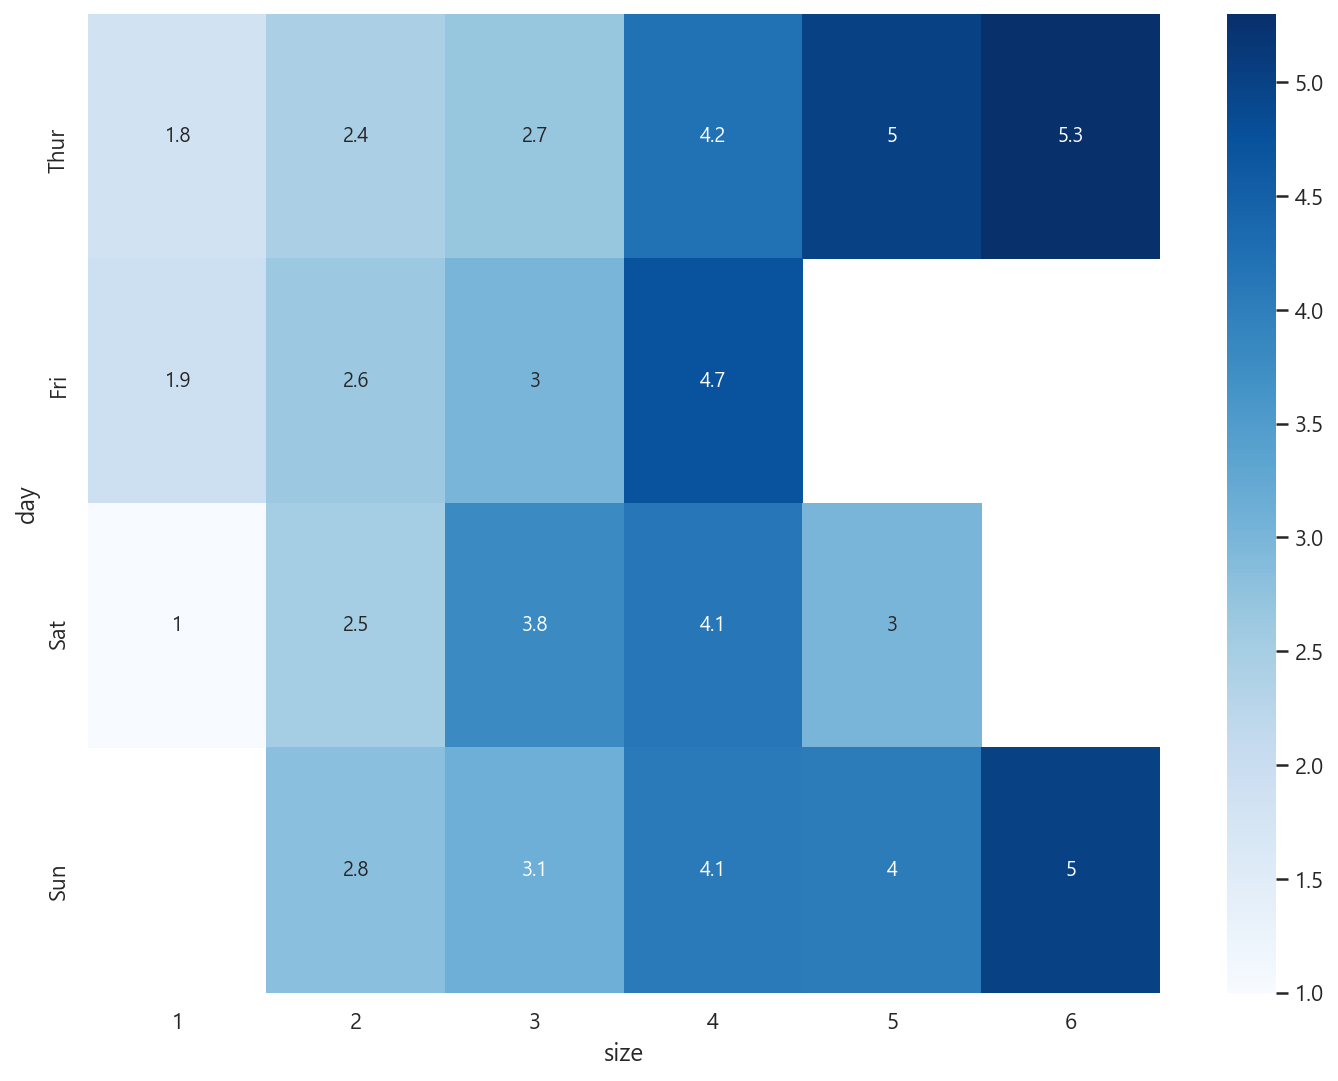

In [42]:
sns.heatmap(pivot, cmap='Blues', annot=True) # cmap으로 전체적인 컬러 조정 가능
plt.show()

In [43]:
# 상관관계를 표시할 때도 heatmap을 유용하게 사용할 수 있따.
# corr() 함수는 데이터의 상관관계를 보여준다.
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


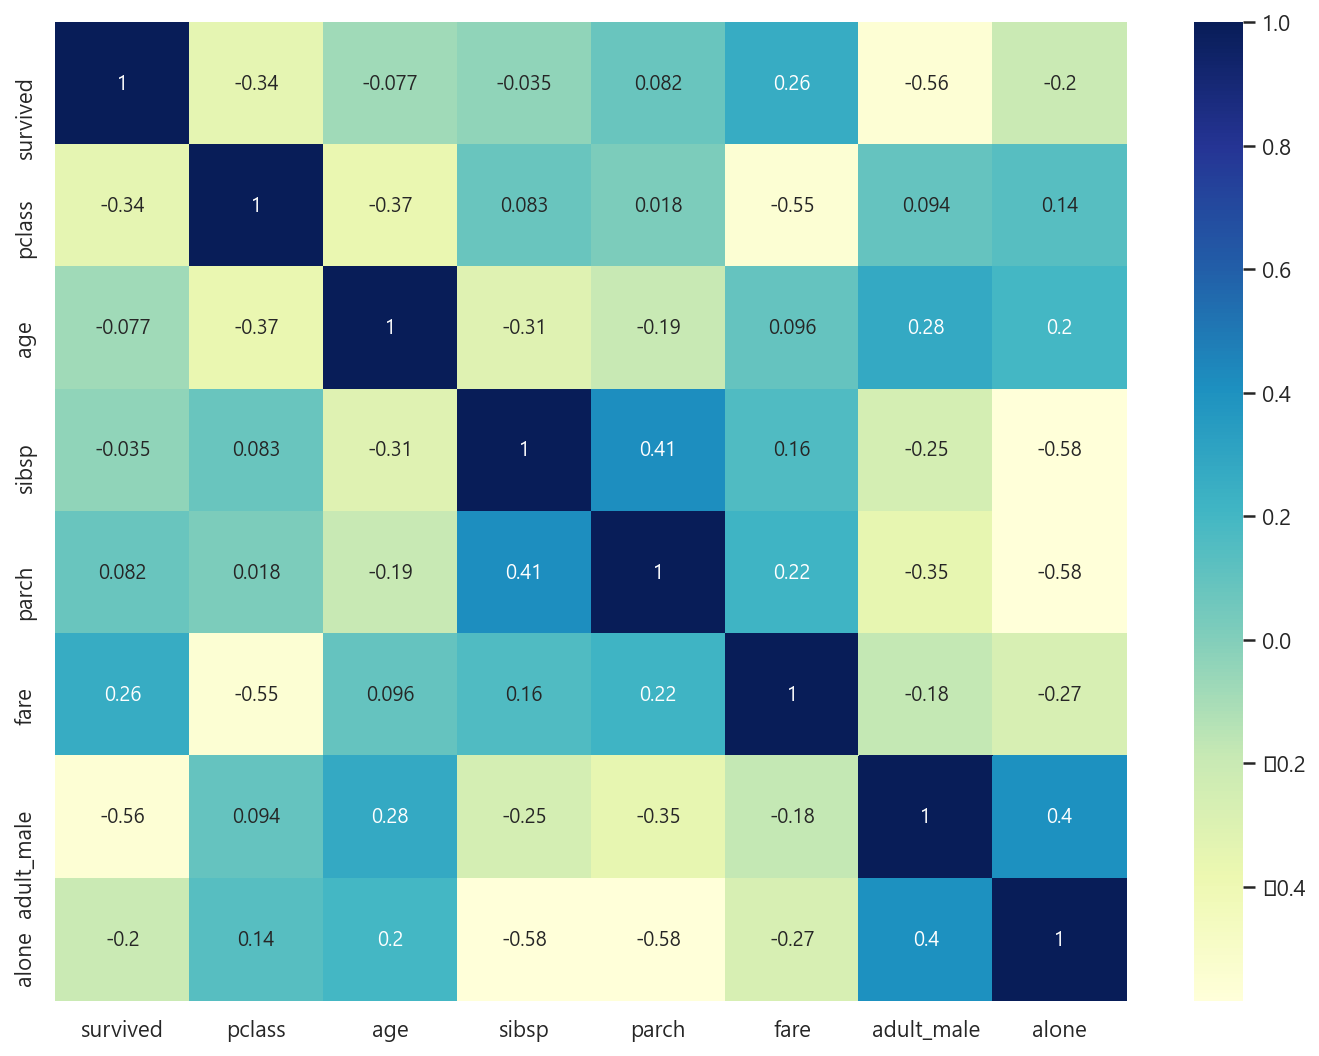

In [61]:
sns.heatmap(titanic.corr(), annot=True, cmap="YlGnBu")
plt.show()